# **Capstone project: Providing data-driven suggestions for HR**

### Introduction : Capstone Project Overview

The present project has been completed and submitted as the final project of the Google Advanced Analytics Certificate Specialization. The project comlpeted at the end of the program provides participants with an opportunity to use skills one developed throughout the entire program within a single project that is designed to closely simulate the type of work conducted by data analytics professionals. Participants are encouraged to include the finished project in their portfolio to demostrate the skills they have acquired by the end of the program.  

The Google Advanced Analytics program was designed in such a way for each of the courses that it is built upon to have an end-of-course project allowing the participants to apply the newly acquired skills specific to every single course offered. However, each course’s end-of-course project did also build on the one before, while breaking down the entire data analysis process into smaller segments, as the courses got progressivelly more challenging towards the end of the program. Thus, every end-of-course project simultaneusly isolated course-specific skills and focused on practicing and reinforcing associated data tasks, all while introducing an element of revision of the material completed previously as well. 

The capstone project, bringing together all the skills and experience that one acquired in each course and the accompanying end-of-course projects, is built in such a way to allow the participant to showcase their skills and knowledge in its full potential while following the steps below: 

* Gather information pertaining to a business problem or an organizational inquiry 

* Answer questions relevant to coding with Python 

* Conduct exploratory data analysis

* Build statistical data models and machine learning models

* Consider ethical issues related to the task

* Present your findings for a general audience of stakeholders

Participants of the program are continiously encouraged to employ the PACE framework taught as a part of one of the courses they have completed at the beginning of their Google Certificate journey. Thus, the following project follows the before mentioned framework that can be additionally illustrated as follows: 

# **PACE stages**


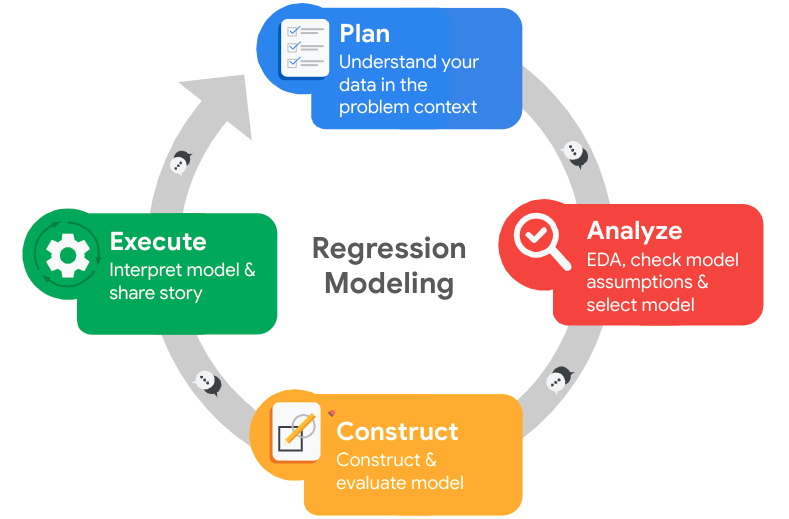

## **PACE: Plan**

### The business scenario and problem

According to the provided scenario, HR department at Salifort Motors (imaginary company in focus for the present project) wants to take some initiatives to improve employee satisfaction levels at the company. That is due to the fact that currently a rather high rate of turnover among Salifort employees has been detected. The turnover data in this particular case includes both employees who choose to quit their job and employees who are let go. Salifort’s senior leadership team is concerned about the mentioned turnover crisis both because the company strives to create a corporate culture that supports employee success and professional development, and because the high turnover rate is rather financially costly due to the fact that Salifort always invests heavily in recruiting, training, and upskilling its employees.

HR personnel has collected some data from employees (prior to that the leadership team asked HR department to survey a sample of employees and learn more about what might be driving turnover), but they don’t know what would be the best way to deal with it. They thus refer to a data analytics professional and ask them to provide data-driven suggestions based on their understanding of the avaliable data. The main question (as formulated initially) to be answered is as follows: **what’s likely to make the employee leave the company?**

The main goals in this project are to analyze the data collected by the HR department and predict whether or not an employee will leave the company by building either a MLS regression model or a ML predictive model (Decision Trees, Random Forest).  Models are expected to predict whether an employee will leave the company based on their job title, department, number of projects, average monthly hours, and any other relevant variables. 

If the built models are able to predict employees likely to quit, it might make it possible to identify factors that contribute to their decision to leave to begin with. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention with the help of the built analytics solutions is expected to be extremely beneficial to the company given the performance of predictive models is satisfactory and the interpretation of the findings is rich in insights and suggestions as to which changes can be made to prevent the company employees from leaving. In the end, the developed models are expected to help the company both increase retention and job satisfaction of current employees and save money and time training new employees.

### HR Dataset 

According to the case description, in the provided [dataset](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv), there are a total of 14,999 rows of observations and 10 columns corresponding to the following variables: 

Variable  |Description |
-----|-----| 
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

## Step 1. Imports

The present stage is composed of: 

*   1.1 Importing the necessary packages
*   1.2 Loading the dataset

### 1.1 Import packages

In [2]:
# Optional code chunk to be used in case of issues regarding the xgboost package
# pip install xgboost

In [3]:
# Data manipulation
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import PercentFormatter

# Data modeling
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree
from scipy.stats import skew 

# Saving models
import pickle

# Displaying dataframe columns
pd.set_option('display.max_columns', None)

### 1.2 Load dataset

In [4]:
# Load dataset into a dataframe
df0 = pd.read_csv("ML(data).csv")
df0 = df0.drop(df0.columns[[0]],axis = 1)

# Display head rows of the dataframe
df0.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low

## Step 2. Data Exploration (Initial EDA and data cleaning)

The present stage is composed of: 

* 2.1 Understanding provided variables
* 2.2 Cleaning the dataset (missing data, redundant data, outliers) 

### 2.1 Understanding provided variables

In [5]:
# Gather basic information about the data
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [6]:
# Gather descriptive statistics about the data
df0.describe()

satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          14999.000000        14999.000000   14999.000000  14999.000000   
mean             201.050337            3.498233       0.144610      0.238083   
std               49.943099            1.460136       0.351719      0.425924   
min               96.000000            2.000000       0.000000      0.000000   
25%              156.000000            3.000000       0.000000      0.000000   
50%              200.000000            3.000000       0.000000      0.000000   
75%              245.000000            4.000000       0.000000      0.000000   
max              310.000000           10.000000       1.000000      1.000000   

       promotion_last_5years  
count           14999.000000  
mean                0.021268  
std                 0.144281  
min                 0.000000  
25%                 0.000000  
50%                 0.000000  
75%                 0.000000  
max                 1.000000

It can be seen that some of the columns in the dataset can be renamed for a more consistent standardized look that makes it easier to deal with the provided data on the more complex analysis and visualization stages that are to follow. Some column names were also misspelled (allegedly, on purpose by the course creators): e.g 'average_montly_hours'. 

In [7]:
# Display all column names
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [8]:
# Rename columns as needed
df0 = df0.rename(columns={'Work_accident': 'work_accident', #lowercase
                          'average_montly_hours': 'average_monthly_hours', #spelling
                          'time_spend_company': 'tenure', #efficiency 
                          'Department': 'department'}) #lowercase

# Display all column names after the update
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### 2.2 Cleaning the dataset (missing data, redundant data, outliers)

In [9]:
# Check for missing values
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

Since the dataset was chosen for the present course and most likely prepared for the participants beforehand there appear to be no missing values in the data. Real life datasets will, undoubtedly, have a lot more missing values and require more rigorous data cleaning to be done before it becomes eligible for the more complex analysis to be carried out on it.  

In [10]:
# Check for duplicates
df0.duplicated().sum()

3008

However, the dataset **does** contain 3,008 rows of duplicates. That is 20% of the data.

In [11]:
# Inspect some rows containing duplicates as needed
df0[df0.duplicated()].head()

satisfaction_level  last_evaluation  number_project  \
396                 0.46             0.57               2   
866                 0.41             0.46               2   
1317                0.37             0.51               2   
1368                0.41             0.52               2   
1461                0.42             0.53               2   

      average_monthly_hours  tenure  work_accident  left  \
396                     139       3              0     1   
866                     128       3              0     1   
1317                    127       3              0     1   
1368                    132       3              0     1   
1461                    142       3              0     1   

      promotion_last_5years  department  salary  
396                       0       sales     low  
866                       0  accounting     low  
1317                      0       sales  medium  
1368                      0       RandD     low  
1461                      0       sales     low

The above output shows the first five occurences of rows that are duplicated further down in the dataframe. It is important to consider if those are legitimate entries and not the ones that were duplicated as a result of some technical issues or other mistakes more human in nature (likely to occur during the survey data collection). In this particular case, it does not seem plausible that two employees self-reported the exact same response for every column. That is a conclusion one can derive especially given the fact that there are several continuous variables across the viewed 10 columns. Thus the duplicates can be dropped without there be any loss of valuable data. 

It is important to be noted that one could potentially perform a likelihood analysis by applying Bayes' theorem and multiplying the probabilities of finding each value in each column in case it appears to be a lot more difficult to judge whether the duplicated entires are legitimate or not. 

In [12]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df1 = df0.drop_duplicates(keep='first')

# Display first few rows of new dataframe as needed
df1.head()

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
1                0.80             0.86               5                    262   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   

   tenure  work_accident  left  promotion_last_5years department  salary  
0       3              0     1                      0      sales     low  
1       6              0     1                      0      sales  medium  
2       4              0     1                      0      sales  medium  
3       5              0     1                      0      sales     low  
4       3              0     1                      0      sales     low

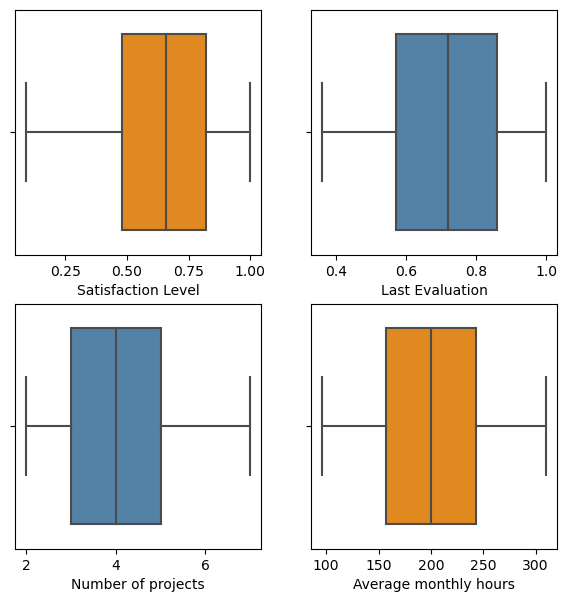

In [13]:
# Create a boxplot to visualize distribution of continious variables in the dataset 
# In order to detect extreme outliers

fig = plt.figure(figsize=(7,7))

plt.subplot(2, 2, 1)
sns.boxplot(x=df1['satisfaction_level'], color='darkorange')
plt.xlabel("Satisfaction Level")

plt.subplot(2, 2, 2)
sns.boxplot(x=df1['last_evaluation'], color='steelblue')
plt.xlabel("Last Evaluation")

plt.subplot(2, 2, 3)
sns.boxplot(x=df1['number_project'], color='steelblue')
plt.xlabel("Number of projects")

plt.subplot(2, 2, 4)
sns.boxplot(x=df1['average_monthly_hours'], color='darkorange')
plt.xlabel("Average monthly hours")

plt.show()

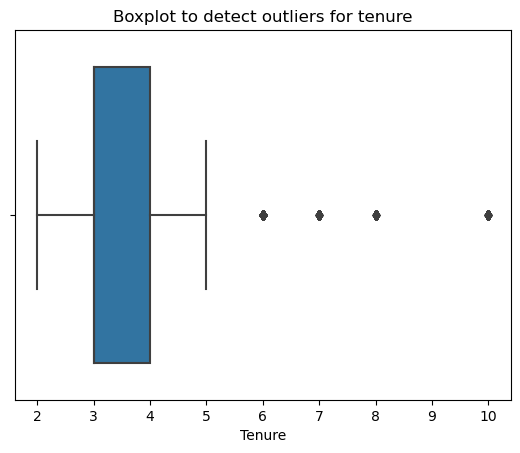

In [14]:
# Create a boxplot to visualize distribution of `tenure` and detect outliers

plt.figure()
plt.title('Boxplot to detect outliers for tenure', fontsize=12)
sns.boxplot(x=df1['tenure'])
plt.xlabel("Tenure")
plt.show()

As can be clearly seen from the boxplots above, `tenure` variable is the only one that has severe outliers compared to the other continious variables in focus. It is worth mentioning that distribution of some of the variables in focus is skewed and not perfectly normal which has to be taken into account. Since `tenure` variable is the most 'problematic' one, the outliers that have been discovered are to be inspected in detail in what follows. 

In [15]:
# Determine the number of rows containing outliers 

# Compute the 25th percentile value in `tenure`
percentile25 = df1['tenure'].quantile(0.25)

# Compute the 75th percentile value in `tenure`
percentile75 = df1['tenure'].quantile(0.75)

# Compute the interquartile range in `tenure`
iqr = percentile75 - percentile25

# Define the upper limit and lower limit for non-outlier values in `tenure`
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Lower limit:", lower_limit)
print("Upper limit:", upper_limit)

# Identify subset of data containing outliers in `tenure`
outliers = df1[(df1['tenure'] > upper_limit) | (df1['tenure'] < lower_limit)]

# Count how many rows in the data contain outliers in `tenure`
print("Number of rows in the data containing outliers in `tenure`:", len(outliers))

Lower limit: 1.5
Upper limit: 5.5
Number of rows in the data containing outliers in `tenure`: 824


The total number of rows containing outliers is 824 which is rather insignificant relatively to the dataset size. However, it is important to remember that certain types of models are more sensitive to outliers than others. Thus the found outliers might have to be removed completely if the chosen model requires one to do so. 

In [16]:
outliers

satisfaction_level  last_evaluation  number_project  \
1                    0.80             0.86               5   
17                   0.78             0.99               4   
34                   0.84             0.87               4   
47                   0.57             0.70               3   
67                   0.90             0.98               4   
...                   ...              ...             ...   
11994                0.22             0.94               3   
11995                0.90             0.55               3   
11996                0.74             0.95               5   
11997                0.85             0.54               3   
11998                0.33             0.65               3   

       average_monthly_hours  tenure  work_accident  left  \
1                        262       6              0     1   
17                       255       6              0     1   
34                       246       6              0     1   
47                       273       6              0     1   
67                       264       6              0     1   
...                      ...     ...            ...   ...   
11994                    193      10              0     0   
11995                    259      10              1     0   
11996                    266      10              0     0   
11997                    185      10              0     0   
11998                    172      10              0     0   

       promotion_last_5years   department  salary  
1                          0        sales  medium  
17                         0        sales     low  
34                         0           hr     low  
47                         0      support     low  
67                         0  product_mng  medium  
...                      ...          ...     ...  
11994                      1   management    high  
11995                      1   management    high  
11996                      1   management    high  
11997                      1   management    high  
11998                      1    marketing    high  

[824 rows x 10 columns]

One can also view the rows with outliers to gain more insights. As it can be seen, the displayed outliers have to do with workers who reported tenure of 6 or 10 years which is higher than the upper limit calculated above. At this point it would be rational to consider whether workers with higher or lower tenure are more likely to leave the company thus making them the 'target audience' of the present project. The above question will be answered in what follows. As for now, the existence of before-mentioned outliers is simply taken into account but left intact. 

# PACE: Analyze Stage

## Step 3. Data Exploration (EDA Continued)

The present stage is composed of: 

* 3.1 Understanding the variable in focus 
* 3.2 Analyzing bivariate distributions 

### 3.1 Understanding the variable in focus 

According to the given scenario, the main variable in focus is employee churn that will eventually be used as the outcome variable various models will aim to predict. The present section of the project is devoted to exploration of bivariate distributions of employee churn with other predictor variables that were provided in the dataset to better understand how those can possibly be connected and interpreted instead of merely focusing on their statistical predictive power or correlation coefficient with the main outcome variable. Insights discovered in what follows can both help when it comes to making decisions on which variables could be soundly included in the model and interpretation of how the best performing predictors are actually related to the main variable in focus once the model is constructed. 

In [17]:
# Get numbers of people who left vs. stayed
print(df1['left'].value_counts())
print()

# Get percentages of people who left vs. stayed
print(df1['left'].value_counts(normalize=True))

0    10000
1     1991
Name: left, dtype: int64

0    0.833959
1    0.166041
Name: left, dtype: float64


The main variable in focus is binary with a '0' value indicating that the employee in question stayed and continued working for the company, while a '1' value indicates that the employee left. As it can be quickly calculated, a total of 1991 employees has left the company which corresponds to nearly 17% of the total dataset entities. 83% of the employees, thus, have stayed at the company. The dataset can be considered moderately imbalanced which, in most circumstances, does not require rebalancing. We will proceeed to use the provided data as it is and consider rebalancing in case the models underperform. 

When it comes to the relationship between the main outcome variable and predictor variables, a heatmap can be built to provide a more holistic view of correlations between the chosen variables present in the dataset. Those variables that have the highest correlation with the outcome variable might end up being the most powerful predictors in predictive models to be built in what follows. Bivariate distributions of those have to be taken into account and explored in detail. 

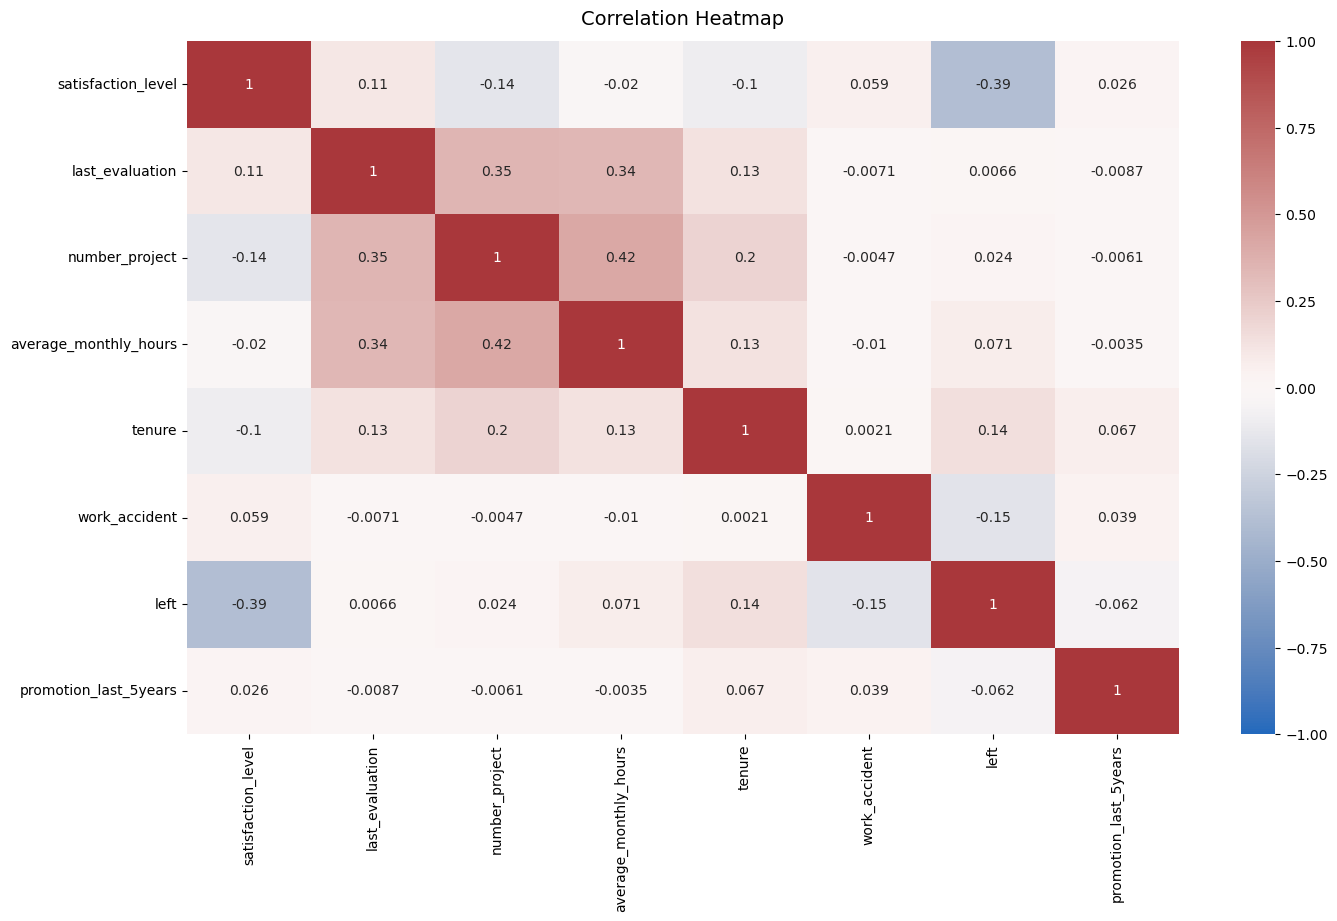

In [18]:
# Plot a correlation heatmap
plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(df0.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

The most notable clusters of correlated variable pairs include: 

1.
- Positive correlation between average monthly work hours and number of projects handled (0.42)
- Positive correlation between number of projects handled and last employee evaluation (0.35)
- Positive correlation between average monthly work hours and last employee evaluation (0.34)

In other words, naturally, employees who have more projects to handle end up working longer hours (which will be explored in more detail in what follows). Such employees also tend to have higher evaluation scores as a 1) result of their hard work or 2) reason as to why they were assigned to more projects in the first place. 

2.
- Negative correlation between satisfaction level and churn (-0.39)

In other words, an employee is less likely to quit if their reported work satisfaction is high. 

3.
- There is a weak positive correlation between churn and tenure observed (0.14) which appears to be counterintuitive due to the fact that it can be assumed that long-tenured employees are unlikely to change their workplace. However, given the lack of employee benefits and rewards it is plausible that one can become more frustrated and more likely to churn as the time goes by. 
- As for the weak positive correlation between tenure and last employee evaluation (0.13) it can theoretically explained that long-tenured employees can potentially get higher HR reviews due to them being more accustomed to the way the company operates resulting in them being more efficient. However, since tenure is also weakly positively correlated with the number of projects handled (0.2) and average monthly work hours (0.13), higher reviews on such employees can also be due to the fact that they are either 1) truly more qualified and talented manifesting through their work load or 2) rewarded for their hard work.  It is also possible that HR additionally rewards long-tenured employees to encourage them to stay. 
- Although weak correlation between churn and work accident variable is present (-0.15) it is negative and thus contrary to the intuitive assumption that could have been made (of there being a chance of HR department firing employees who have had an accident reported). 

### 3.2.1 Analyzing bivariate distributions

Since, as it has been discovered, there appears to be a cluster of highly correlated variables (see group 1 in 3.1), one can begin with creating a boxplot or a histogram showing the distribution of reported `average_monthly_hours` by the `number_project` variable to explore the relationship between the two, while also comparing the distributions of employees who stayed versus those who left. The correlation between these two variables was found to be the strongest (0.42). 

This visualization (graph on the left) can provide a lot of valuable information, finally taking a closer look at what differences exist between those workers who stayed and those who left when it comes to this particular group of explanatory variables. The graph to the right visualizes the distribution of those who stayed and those who left by the `number_project` variable to provide additional context for the former plot. 

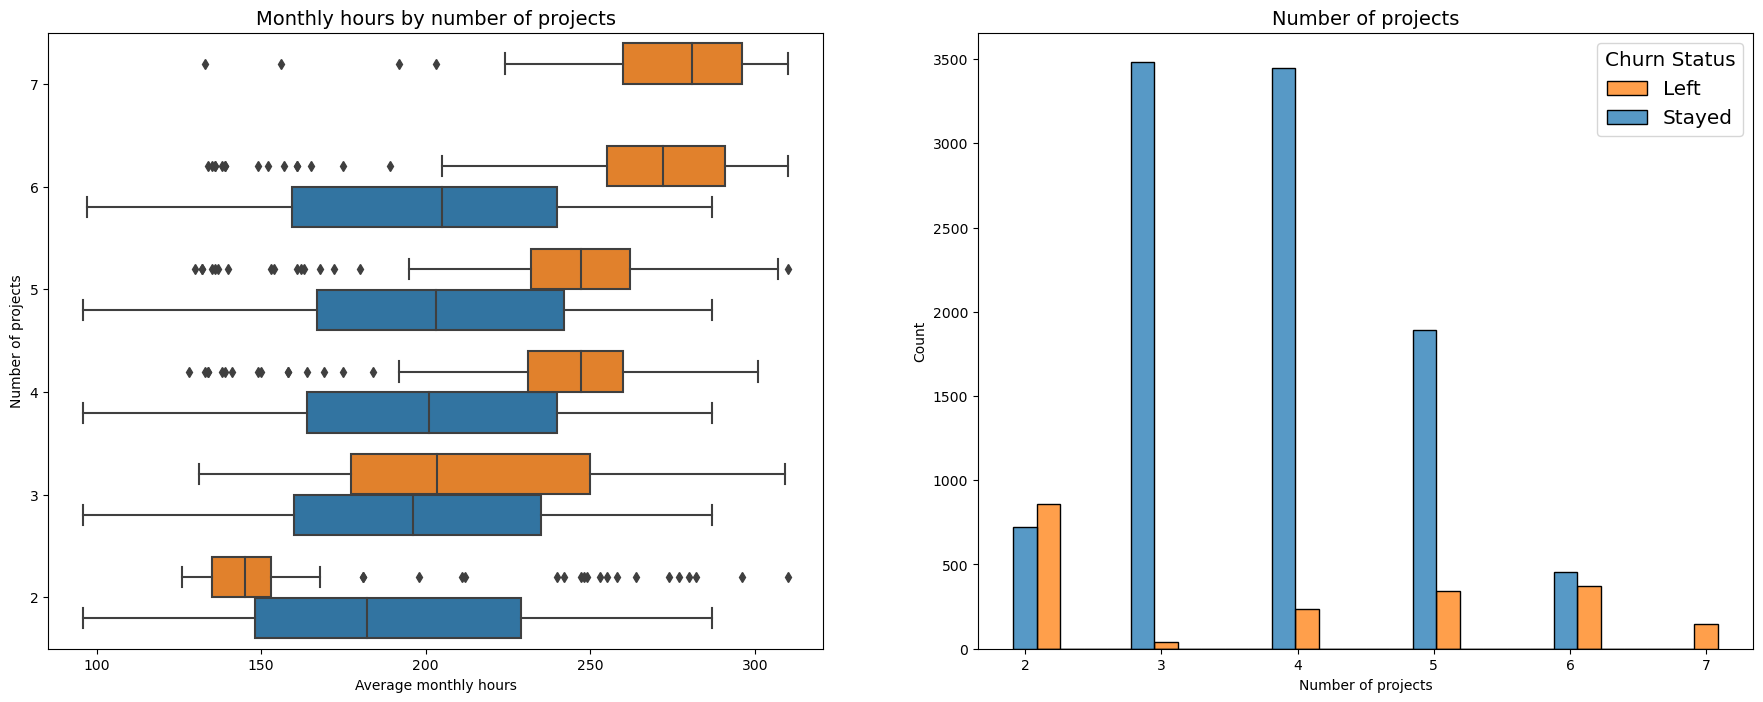

In [19]:
# Bivariate distribution: average monthly hours, number of projects and churn 

# Separate entities representing different churn status
tenure_stay = df1[df1['left']==0]['number_project']
tenure_left = df1[df1['left']==1]['number_project']

# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Create boxplot showing `average_monthly_hours` distributions for `number_project`, comparing employees who stayed versus those who left
sns.boxplot(data=df1, x='average_monthly_hours', y='number_project', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Monthly hours by number of projects', fontsize='14')
ax[0].get_legend().remove()
ax[0].set(xlabel='Average monthly hours')
ax[0].set(ylabel='Number of projects')

# Create histogram showing distribution of `number_project`, comparing employees who stayed versus those who left
sns.histplot(data=df1, x='number_project', hue='left', multiple='dodge', shrink=2, ax=ax[1])
ax[1].set_title('Number of projects', fontsize='14')
ax[1].set(xlabel='Number of projects')
plt.legend(labels = ['Left', 'Stayed'], title='Churn Status', fontsize='x-large', title_fontsize='x-large')

# Display the plots
plt.show()

Now that the graphs are constructed it is important to derive valuable insights from the observed data patterns. 

Overall, the intuintive assumption would be that people who have more projects that they are working on would also work longer hours on average compared to their peers assigned to a smaller number of projects at the same time. This assumption proves to be correct as the graph on the left illustrates the point made with the boxplots moving to the right (higher average monthly work hours) as the number of projects an employee is responsible for increases. This could be expected given the positive correlation between the two variables. Additionally, this appears to be the case for both color-coded groups of employees - those who ended up leaving the company and staying. 

In [20]:
# Calculate mean and median number of projects handled by employees and their average monthly work hours who left and those who stayed
print("Mean number of projects:", df1['number_project'].mean())
print("Median number of projects:", df1['number_project'].median())

print("Mean monthly work hours:", df1['average_monthly_hours'].mean())
print("Median monthly work hours:", df1['average_monthly_hours'].median())

Mean number of projects: 3.802852139104328
Median number of projects: 4.0
Mean monthly work hours: 200.4735218080227
Median monthly work hours: 200.0


In [21]:
# Calculate mean and median number of projects handled by employees who left and those who stayed
df1.groupby(['left'])['number_project'].agg([np.mean,np.median])

mean  median
left                  
0     3.786800     4.0
1     3.883476     4.0

In [22]:
# Calculate mean and median average monthly hours of employees who left and those who stayed
df1.groupby(['left'])['average_monthly_hours'].agg([np.mean,np.median])

mean  median
left                   
0     198.94270   198.0
1     208.16223   226.0

The following insights can be derived: 

1. As illustrated more clearly on the right graph, there are two particular cases of the number of employees who left outweighing the number of those who stayed: (A) The case of those employees working on significantly fewer projects than other employees (e.g, 2) and (B) The case of those employees working on significantly more projects (e.g, 7). The baseline mean values for both number of projects an employee is handling and the average monthly work hours of one are displayed above. However, it is important to note, that in the case of A scenario it could be possible that the mentioned employees were either fired precisely because they were unable to handle more projects simultaneously or they simply already got their notice beforehand and didn't feel obligated to work as hard. On the contrary, high work load (the B case) seems to be a valid enough reason one could decide to quit and this can potentially be a strong predictor of the latter decision. In turn, this means that this can become one of the metrics that HR department can monitor, keep in check and improve in order to solve the problem of churning. 

2. As for the B case, it can be observed on the first graph that the interquartile ranges of the group of employees handling 7 projects at the same time, with all of them eventually leaving the company, were `~255-295 hours/month` which is much higher than the same metric of any other group. The monthly work hours interquartile ranges of those working on 6 projects at the same time, similarly, were exceptionally high. 

3. Some additional calculations can be made. If a work week of 40 hours and two weeks of vacation per year is assumed, then the average number of working hours per month of employees working Monday&ndash;Friday `= 50 weeks * 40 hours per week / 12 months = 166.67 hours per month`. The average monthly work hours metric calculated above revealed that the mean figure among all the employees was 200 work hours per month which is considerably higher (the average figure is even higher among those employees who made a decision to leave which is expected given the fact that it is hypothesized that such employees also handled more projects at the same time). While it appears to be true that those employees who left the company were overworked, it also appears to be the case that even those employees who decided to stay are actually overworking which should be a concern given they are likely to still quit after some time. 

4. The higheest gap between the number of employees leaving and staying was observed in 3-4 projects handlded by an employee groups. This might be the optimal number of projects one can handle without getting overworked both physically (long working hours) and mentally. The gap significantly shrinks for the group of employees handling 5 or more projects at the same time. 

The above mentioned insight **#4** can be illustrated by an additional stacked graph showcasing the share of emloyees leaving the company by the number of projects an employee is involved in. While it is rather intuitive to assume that more employees would be leaving the company as the number of projects they have to be working on increases, we can also see that the share of employee churn is almost 50/50 when it comes to those handling 2 projects at the same time which is rather surprising. It might be beneficial to look into this particular group of people in focus to see if there are any pecularities observed. 

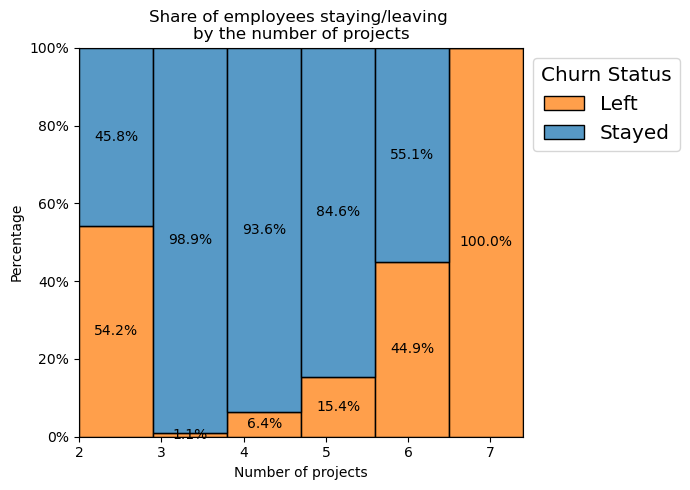

In [23]:
# Create stacked barchart to compare share of employee churn by the employee workload
plt.figure(figsize=(7,5))
ax = sns.histplot(data=df1, x='number_project', hue='left', stat='probability', multiple = 'fill', binwidth=0.9)
ax.legend(labels = ['Left', 'Stayed'], title='Churn Status', fontsize='x-large', title_fontsize='x-large', 
          loc='upper left', bbox_to_anchor=(1, 1))
ax.set(xlabel='Number of projects', ylabel='Percentage', title = 'Share of employees staying/leaving \nby the number of projects')

for bars in ax.containers:
    heights = [b.get_height() for b in bars]
    labels = [f'{h * 100:.1f}%' if h > 0.001 else '' for h in heights]
    ax.bar_label(bars, labels=labels, label_type='center')
    
ax.yaxis.set_major_formatter(PercentFormatter(1))
plt.tight_layout()
plt.show()

In [138]:
# Calculate mean metrics by the number of projects handled overall
df1.groupby(['number_project']).agg({
    'satisfaction_level': 'mean',
    'last_evaluation': 'mean', 
    'average_monthly_hours': 'mean', 
    'tenure': 'mean',
    'promotion_last_5years': 'sum', 
    'work_accident': 'sum'
})

satisfaction_level  last_evaluation  average_monthly_hours  \
number_project                                                               
2                         0.499071         0.584640             164.812263   
3                         0.689418         0.717415             197.337784   
4                         0.694280         0.735682             203.872456   
5                         0.671155         0.750072             209.125392   
6                         0.314673         0.765654             230.392252   
7                         0.116690         0.863517             275.620690   

                  tenure  promotion_last_5years  work_accident  
number_project                                                  
2               3.186473                     19            176  
3               3.144602                     62            619  
4               3.300407                     76            592  
5               3.604120                     33            350  
6               4.154964                     13            111  
7               4.110345                      0              2

In [25]:
# Calculate mean metrics by the number of projects handled and churn status
df1.groupby(['number_project', 'left']).agg({
    'satisfaction_level': 'mean',
    'last_evaluation': 'mean', 
    'average_monthly_hours': 'mean', 
    'tenure': 'mean',
    'promotion_last_5years': 'sum', 
    'work_accident': 'sum'
})

satisfaction_level  last_evaluation  \
number_project left                                        
2              0               0.601586         0.663545   
               1               0.412345         0.517888   
3              0               0.690640         0.716893   
               1               0.577368         0.765263   
4              0               0.689983         0.725044   
               1               0.756793         0.890464   
5              0               0.657614         0.723116   
               1               0.745773         0.898601   
6              0               0.463165         0.687341   
               1               0.132561         0.861698   
7              1               0.116690         0.863517   

                     average_monthly_hours    tenure  promotion_last_5years  \
number_project left                                                           
2              0                186.880000  3.380690                     14   
               1                146.143524  3.022170                      5   
3              0                197.177197  3.136990                     62   
               1                212.052632  3.842105                      0   
4              0                201.241879  3.191705                     74   
               1                242.143460  4.881857                      2   
5              0                202.706349  3.348148                     33   
               1                244.495627  5.014577                      0   
6              0                198.617582  4.204396                     12   
               1                269.361186  4.094340                      1   
7              1                275.620690  4.110345                      0   

                     work_accident  
number_project left                 
2              0               131  
               1                45  
3              0               618  
               1                 1  
4              0               574  
               1                18  
5              0               334  
               1                16  
6              0                88  
               1                23  
7              1                 2

The question that we are trying to answer here is: **How come among employees who were working on 2 projects at the same time more than 50% churned?** Thus we can compare various metrics of this particular group with those of employees handling more than 2 projects at the same time at first. 

As it can be clearly seen right away the mean satisfaction level of such employees was lower than that of ex-employees working on more projects (0.41 compared to 0.57(3), 0.75(4), and 0.74(5)). The satisfaction level was only lower for those employees who worked on over 6 projects and were clearly dissatisfied with their work situation (0.13(6), 0.11(7)). Overall, similarly, satisfaction level of all the employees working on 2 projects at the same time was the third to last. **But what could possibly lead to such low satisfaction scores among those only handling 2 projects at the same time?**

Mean evaluation scores of churned 2-project employees are lower than those of any other churned employee group (0.51) both among those who did churn and those who stayed. Interestingly enough, even the mean evaluation score of those who were working on 2 projects and stayed is lower than that of other groups of employees who stayed. Logically, one can assume that employees who recieved such low evaluation scores were not regarded as valuable to the company and thus could be assigned to handle less projects. When it comes to those among them who did decide to leave it could have been that they were either fired due to their low skills or, alternatively, it could be that despite their actual skills of good quality such employees were so dissatisfied with their work that they simply decided to go down the 'quiet quit' route and stopped working as hard as they potentially could (even, mayhaps, taking on less projects to work on themselves) thus resulting in an outcome described above. 

Due to a rather apparent positive correlation between the number of projects carried out by an employee and their monthly work hours (except for the case of employees working on 6 projects and staying), it is quite expected that those employees who worked on 2 projects also had reported the lowest monthly work hours. However, it is still important to keep in mind that their low work load could both be the result of either their dissatisfaction or poor skills.

When it comes to tenure, there seemes to be a bit of an off trend with the mean tenure among employees handling 2 prjects being higher than that of employees handling 3 projects despite the overall trend seemingly being upward. However, what is notable is that among employees handling from 3 to 5 projects mean tenure of those who churned has been lower than that of those who stayed. This can be indicative of such employees feeling like they could've handled more projects than they were assigned to **or** such employees choosing to work on less projects due to their overall piled up dissatisfaction with their job explained by other factors. As for the 2-project employee cluster tenure of those who left the company is interestingly enough lower than that of those who stayed. It could be due to the fact that such employees felt like it was easier for them to leave the company after realizeing this job was not for them or they felt dissatisfied. 

As for the number of employees promoted in the last 5 years, the information at hand appears to be insufficient making the intrepretation of the overall trend difficult. For instance, while it is true that only 19 employees handling 2 projects at the same time were promoted in the last 5 years and the overall trend could be hypothesized to go upwards, only 13 employees working on 6 projects were promoted compared to 33 employees handling 5 projects getting a promotion. Instead of an upward trend, the distribution appears to be rather normal, with employees handling 3-4 projects getting the highest number of promotions in the group. As mentioned above, the low number of promoted employees among the group in focus can be both among the reasons behind them leaving the company (assuming more employees were actually worhty of getting a promotion) or justified by their performance. It has to be taken into account that project-based groups differ in size and it is more useful to analyze shares instead of raw counts. 

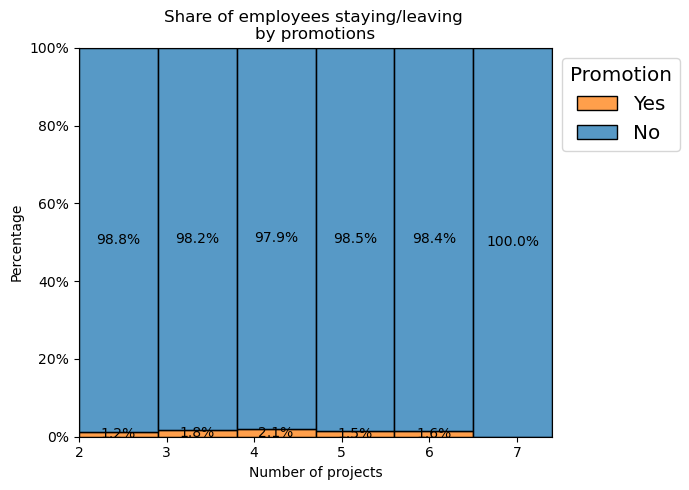

In [26]:
# Create stacked barchart to compare share of employee prmotion by the employee workload
plt.figure(figsize=(7,5))
ax = sns.histplot(data=df1, x='number_project', hue='promotion_last_5years', stat='probability', multiple = 'fill', binwidth=0.9)
ax.legend(labels = ['Yes', 'No'], title='Promotion', fontsize='x-large', title_fontsize='x-large', 
          loc='upper left', bbox_to_anchor=(1, 1))
ax.set(xlabel='Number of projects', ylabel='Percentage', title = 'Share of employees staying/leaving \nby promotions')

for bars in ax.containers:
    heights = [b.get_height() for b in bars]
    labels = [f'{h * 100:.1f}%' if h > 0.001 else '' for h in heights]
    ax.bar_label(bars, labels=labels, label_type='center')
    
ax.yaxis.set_major_formatter(PercentFormatter(1))
plt.tight_layout()
plt.show()

As it can be seen, when it comes to the overall number of employees getting promoted the share is rather similar across all project-groups with an exception of the 7-project employee group where no employee promotions were registered in the last 5 years. 

The number of accidents among the employees who worked on 2 projects and churned is notably the highest among the other churned groups. Undoubtedly, this could be attrivuted to mean tenure of such employees being rather short thus making the chances of them making mistakes higher. However, employees with higher tenures (those who worked on 2 projects and stayed) had even more accidents, thus making this hypothesis rather weak. An additional visualization can be built to uncover whether this group of employees had the largest share of accidents. 

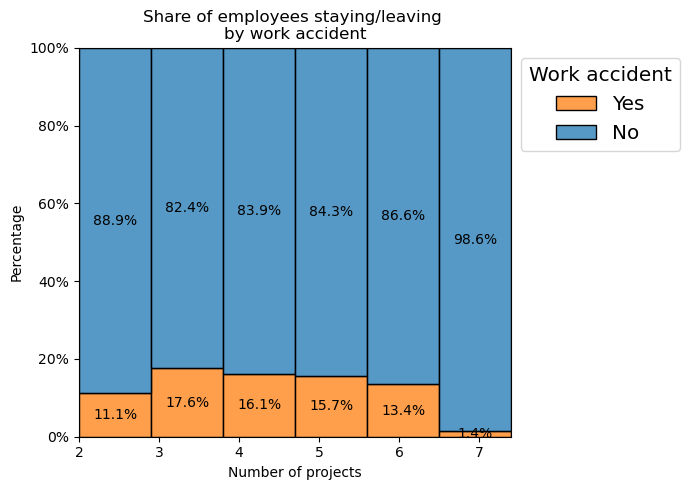

In [27]:
# Create stacked barchart to compare share of work accidents by the employee workload
plt.figure(figsize=(7,5))
ax = sns.histplot(data=df1, x='number_project', hue='work_accident', stat='probability', multiple = 'fill', binwidth=0.9)
ax.legend(labels = ['Yes', 'No'], title='Work accident', fontsize='x-large', title_fontsize='x-large', 
          loc='upper left', bbox_to_anchor=(1, 1))
ax.set(xlabel='Number of projects', ylabel='Percentage', title = 'Share of employees staying/leaving \nby work accident')

for bars in ax.containers:
    heights = [b.get_height() for b in bars]
    labels = [f'{h * 100:.1f}%' if h > 0.001 else '' for h in heights]
    ax.bar_label(bars, labels=labels, label_type='center')
    
ax.yaxis.set_major_formatter(PercentFormatter(1))
plt.tight_layout()
plt.show()

Interstingly, the group of employees that had the largest share of work accidents overall consists of employees working on 3 projects. Despite such a large number of work accidents, almost all of the employees stayed at the company except for one. Similarly, given that overall share of work accidents among other groups is larger than that of 2-project employee group it is quite unlikely that the work accidents actually lead to employees being fired. Similarly, if the number of work accidents was assumed to be linked with laziness and employee's desire to slack off due to their low satisfaction levels, we wouldn't observe such a high number of work accidents among other groups of employees that were quite satisfied with their job. Overall, it is quite plausible that the fact that so many churned employees of the 2-project group had work accidents can be a statistical coincidence. Additionally, it is plausible that such employees quit simply because they have realized (due to sch work accidents) that this job was not a great match for them. 

Finally, we can move to the last variable that can be checked for the group in focus and answer the question of whether such emplpoyees handling 2 projects at the same time and feeling dissatisfied with their job largely belonged to the same department. 

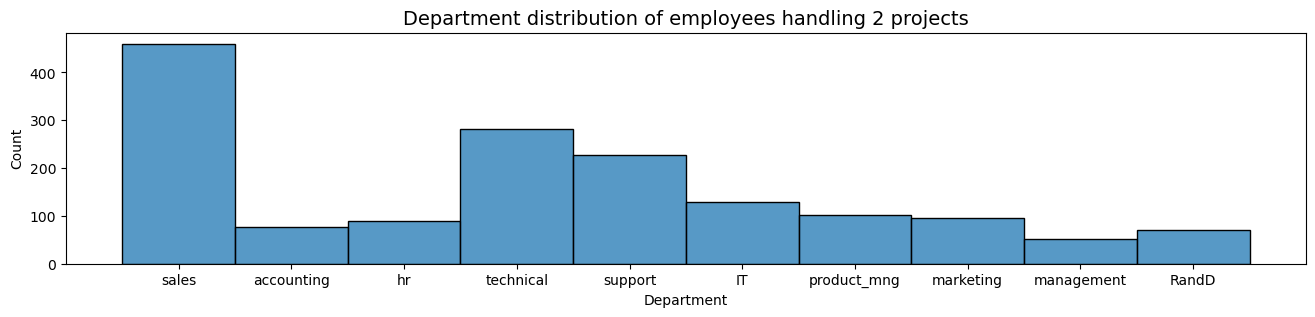

In [28]:
# Create barchart to compare the number of employees with different workload across the departments
plt.figure(figsize=(16, 3))
sns.histplot(data=df1[df1['number_project']==2], x='department')
plt.title('Department distribution of employees handling 2 projects', fontsize='14')
plt.xlabel("Department")
plt.ylabel("Count")
plt.show()

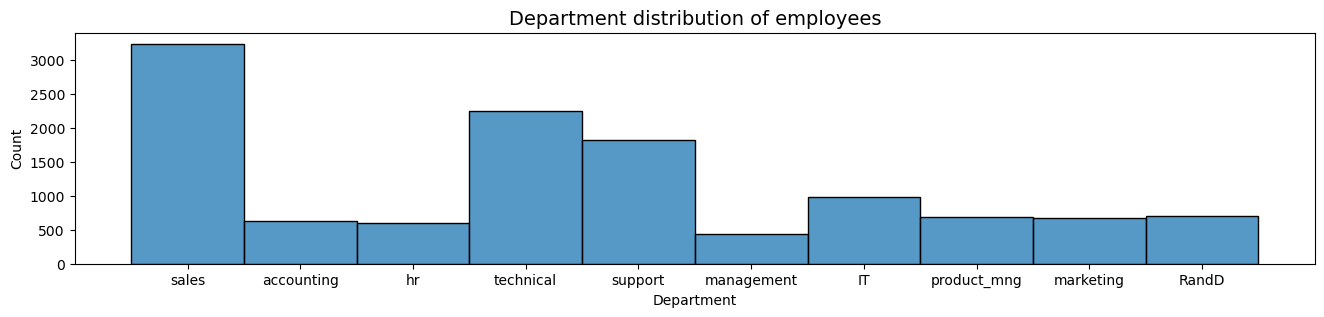

In [29]:
# Create barchart to compare the number of employees across the departments
plt.figure(figsize=(16, 3))
sns.histplot(data=df1, x='department')
plt.title('Department distribution of employees', fontsize='14')
plt.xlabel("Department")
plt.ylabel("Count")
plt.show()

While it is true that the sales department had the largest number of employees working on 2 projects, it is also true that the sales department also had the largest number of employees overall. This calls for an additional graph comparing the **shares** of employees working on different numbers of projects. 

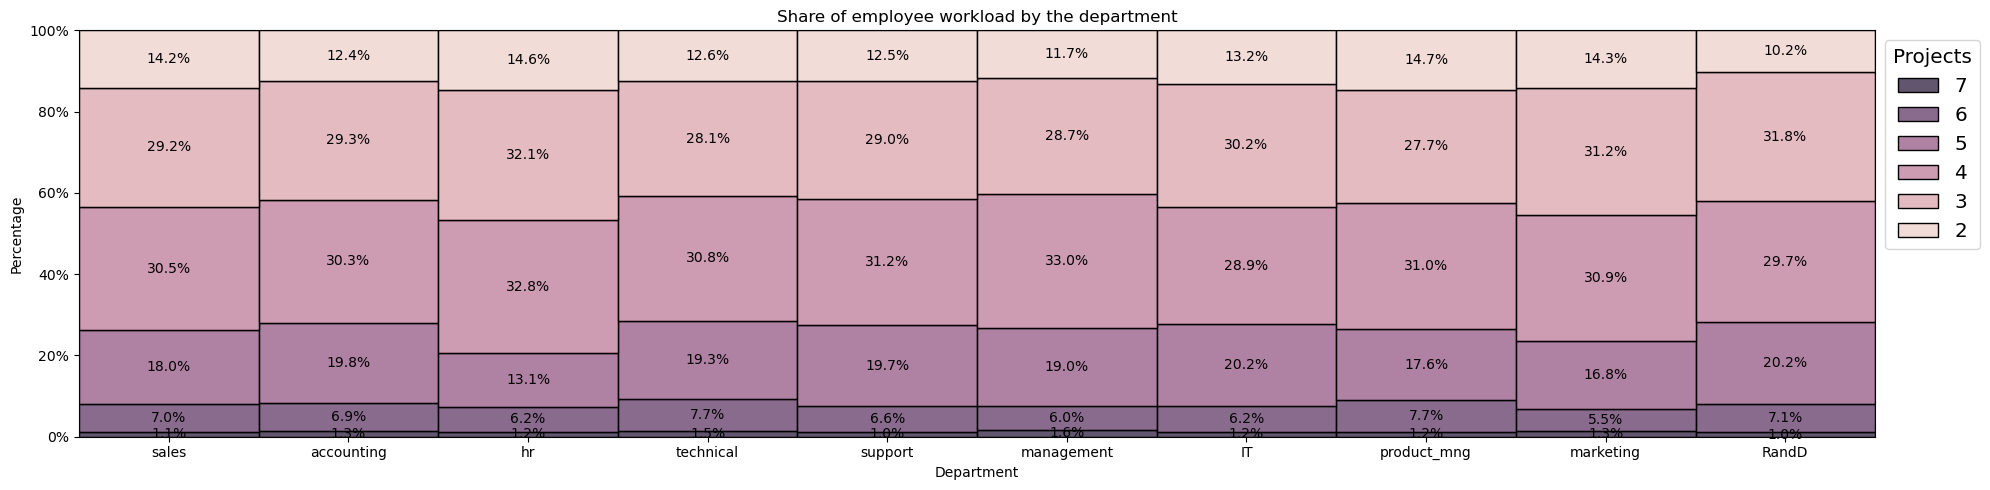

In [30]:
# Create stacked barchart to compare department share of employee workload
plt.figure(figsize=(20,5))
ax = sns.histplot(data=df1, x='department', hue='number_project', stat='probability', multiple = 'fill', binwidth=0.9)
ax.set(xlabel='Department', ylabel='Percentage', title = 'Share of employee workload by the department')
ax.legend(labels = ['7', '6', '5', '4', '3', '2'], title='Projects', fontsize='x-large', title_fontsize='x-large', 
          loc='upper left', bbox_to_anchor=(1, 1))

for bars in ax.containers:
    heights = [b.get_height() for b in bars]
    labels = [f'{h * 100:.1f}%' if h > 0.001 else '' for h in heights]
    ax.bar_label(bars, labels=labels, label_type='center')
    
ax.yaxis.set_major_formatter(PercentFormatter(1))
plt.tight_layout()
plt.show()

The shares of employees who worked on 2 projects at the same time seem to be rather similar across the departments. The ones with a slightly larger shares include: the product management(14.7%), accounting (14.6%), marekting (14.3%), sales (14.2%) and IT (13.2%). These can be kept in mind to take a better look at once we dive into EDA for the department variable.  

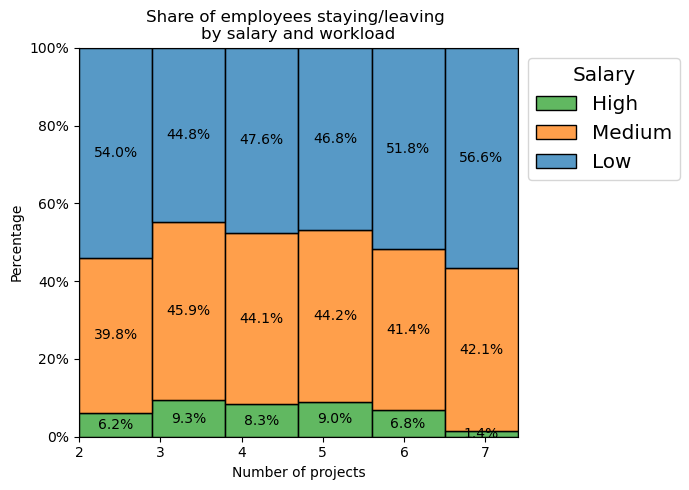

In [31]:
# Create stacked barchart to compare share of salary groups by employee workload
plt.figure(figsize=(7,5))
ax = sns.histplot(data=df1, x='number_project', hue='salary', stat='probability', multiple = 'fill', binwidth=0.9)
ax.legend(labels = ['High', 'Medium', 'Low'], title='Salary', fontsize='x-large', title_fontsize='x-large', 
          loc='upper left', bbox_to_anchor=(1, 1))
ax.set(xlabel='Number of projects', ylabel='Percentage', title = 'Share of employees staying/leaving \nby salary and workload')

for bars in ax.containers:
    heights = [b.get_height() for b in bars]
    labels = [f'{h * 100:.1f}%' if h > 0.001 else '' for h in heights]
    ax.bar_label(bars, labels=labels, label_type='center')
    
ax.yaxis.set_major_formatter(PercentFormatter(1))
plt.tight_layout()
plt.show()

Lastly, when it comes to employee salary, the group of employees handling 2 projects at the same time doesn't stand out as much. It is, however, notable that among those employees who are handling the highest number of projects only 1.4% recieve high salary which can be considered rather surprising (the share of highly paid employees of those working on 2 projects is ranked second to last). Such finding appears counterintuitive due to the fact that it can be assumed that employees who are entrusted to handle more projects are the most skillful and experienced ones. Given their excellent performance **and** exceptionally long work hours it would be natural to assume that their salary would be higher. However, as it turns out, this particular group has the largest share of employees receiving low salary (56.6%). An alternative hypothesis can be that more long-tenured employees are being given important projects to work on (and most likely making sure their attention is only focused on such) the rest of the projects fall i. nto the hands of employees who are either new hires or are considered less valuable thus manifesting itself in their salary. That, however, is contradictory to the mean evaluation score of such employees

To check the proposed assumptions we can go back to the table with mean figures characterizing the employee groups by project workload. When it comes to employees working on 7 projects at the same time, their mean tenure is actually the second highest, falling slightly behind that of employees working on 6 projects (4.11 and 4.15 accrordingly) thus proving the asssumption that those could be new hires wrong. As for the quality of work, the mean evaluation score of emplyees working on 7 projects is the highest among other groups - 0.86. Additionally, this group reported the smallest number of accidents (2) but none of the employees were promoted in th last 5 years. It is becoming apparent, that the lowest registered mean satisfaction score reported by employees from this group can be attributed to the lack of company rewards and compensation contrasting how hard such employees are working eventually leading to churn of such employees. 

Note that potentially the low number of work accidents could be explained by the lack of work carried out by an employee group in case their dissatisfaction with their job made them already make up their mind and decide on leaving thus refusing to work as hard as they could have. This does not appear to be the case given the fact that the group in question is working the longest hours and participating in the highest number of projects. On the contrary, another point that needs to be made is that evaluation scores could potentially be a result of HR trying to incentivize employees from this group and reward them for their hard work instead of it being an accurate assessment of their skills. If that is indeed the case, however, it remains unclear why would these employees get assigned to work on this many projects given their relatively high tenure and lack of work accidents. Other unknown contributing variables could be in work.

### 3.2.2 Analyzing bivariate distributions

As was visualized by the heatmap, both the number of projects an employee is handling and their work hours are positively correlated with employee evaluation score (see group 1 in 3.1). The following visualization explores the before mentioned pair or correlated variables. 

Additionally, it is important to remember that the present dataset categorized both employees that left the company due to them being fired and those who decided to leave themselves as '1'. Thus, it could be beneficial to look at such a variable as evaluation metric, assuming that bad HR evaluation could be among the reasons why one could be potentially laid off. It can be hypothesized that those employees who work longer hours and handle more projects at the same time are evaluated higher both as a way for being praised for their hard work and, potentially, as a true sign of them being a valuable employee which, in turn, could have been the reason why they got this many projects to work on to begin with.

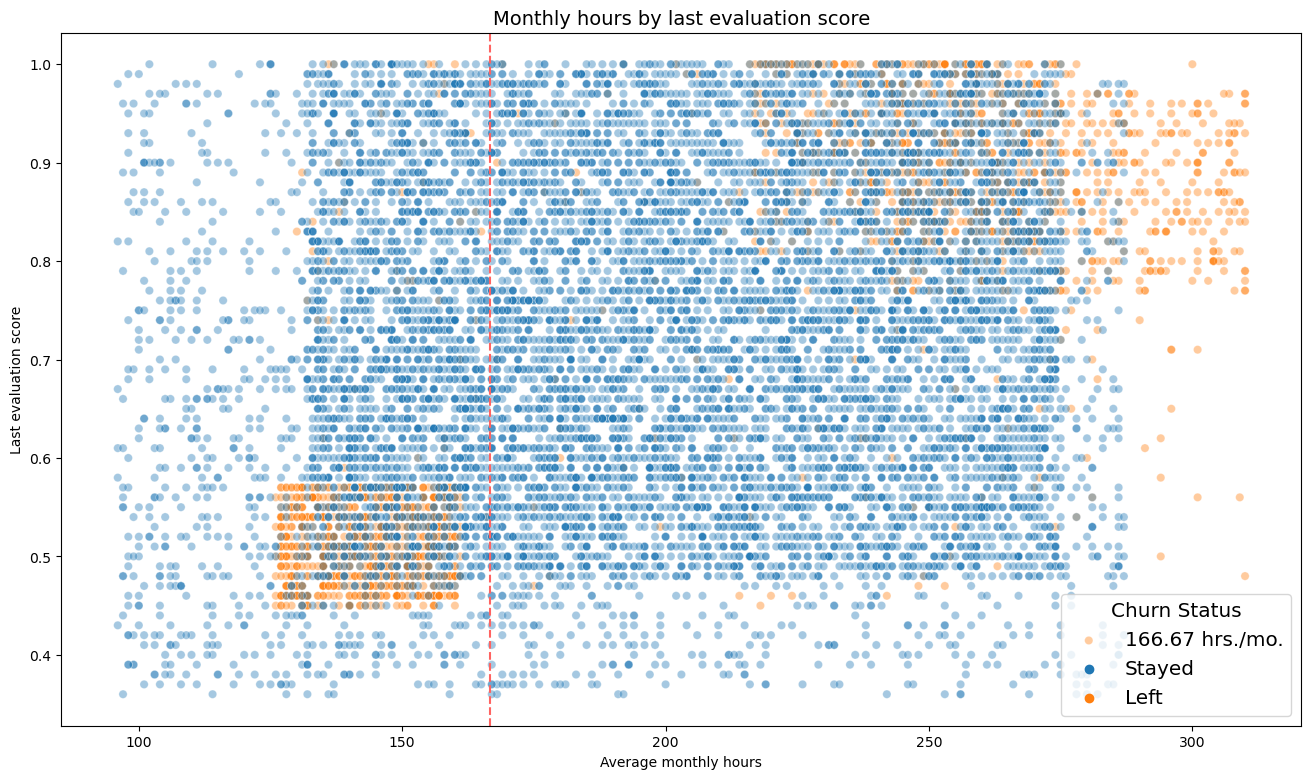

In [32]:
# Bivariate distribution: average monthly hours, evaluation scores and churn

plt.figure(figsize=(16, 9))
sns.scatterplot(data=df1, x='average_monthly_hours', y='last_evaluation', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')
plt.legend(labels = ['166.67 hrs./mo.','Stayed', 'Left'], title='Churn Status', fontsize='x-large', title_fontsize='x-large')
plt.title('Monthly hours by last evaluation score', fontsize='14')
plt.xlabel("Average monthly hours")
plt.ylabel("Last evaluation score")

plt.show()

The following insights can be derived:

1. A picture resembling the bivariate distribution of average monthly hours and evaluation score emerges. It could even be hypothesized that the cluster of workers with the evaluation score of `0.45-0.6` and average monthly work hours amounting to `130-165 hours` is at least to some extent overlapping with a similar one observed on the scatterplot in what follows (bivariate distribution of working hours vs satisfaction). However, an 'outlier' group of overworked and yet extremely dissatisfied employees that will emerge in what follows is currently not there. As for the upper right corner of the plot, the group that occupies it right now will be a lot more concenrated in case of satisfaction under the assumption that its location didn't change drastically. 

2. The bigeest main cluster of employees who stayed can be used as a benchmark to make some notes on those entities deviating from it. First off, it can be clearly seen that the majority of the discussed cluster consists of employees working more than 167 hours per month. As for the evaluation scores, those range from `0.5 to 1 (or 5/10 - 10/10)`.

3. Unlike the next plot where three clear clusters of churned employees will be identified, we now observe only two: a dispersed cluster of overworked employees who performed very well according to the latest evaluation and a more concentrated cluster of employees who worked slightly under the nominal monthly average of `166.67 hours` with lower evaluation scores. The connection between evaluation scores and monthly working hours observed on the scatterplot proves the hypothesis made earlier to be true: there can be expected a positive correlation between the two, with the presence of a causal relationship there being a quite tangible possibility. 

4. An intersting observation can be made in regards to extremes of the evaluation scores spectrum. Despite there being a rather low number of employees in the upper left quadrant of this plot, working long hours doesn't necessarily guarantee a good evaluation score. When it comes to those employees working over `285 hours a month`, the vast majority of them recieved high evaluation scores beyond `0.8` and most of them, at the same time, quit. There seems to emerge a dividing line at the point of `280 work hours per month`: the distribution of employees who work for around `275-280` a month seems to follow a pattern similar to that of the main data cluster - evaluation scores of these employees are dispersed, even more so than they are for the majority of the data since the data points are not concentrated above the evaluation score of `0.5`. This slice of employees includes both employees who decided to stay and those who quit, with the latter representing a minority. However, when it comes to data points that go past the dividing line of `285`, all of the employess there 1) recieved high evaluation scores and 2) left. HR department would benefit from keeping this particular threshold in mind: `285 hours of work per month` might be the exact limit for employees. Work load above the limit imposes too much physical and emotional stress on employees and results in them quitting. It would be thus important to monitor the employees and the number of projects they are working on (since the clear connection between the number of projects one is assigned to and their average monthly working hours has been made apparent above) and make sure the employee workload doesn't go over the limit to prevent them from quitting. One's workload going past the `280` which seems to be less of an issue can also be used as the first alert to the HR department signaling the need to take action before it's too late. 

5. An additional point has to be made in regards to high evaluation scores given to the upper-right cluster of employees who quit. Althout it is a lot more plausible that those were the overworked employees who ended up being assigned to too many projects to handle at the same time due to them being exceptionally valuable to the company and really good at their job, thus explaining high evaluation scores, it is important to keep in mind that high evaluation scores (or, rather, higher than those would have been in other circumstances) could be potentially given to some employees as an incentive in an attempt to either make them stay or simply tolerate the high work load they ended up having to deal with. Thus, evaluation scores need to be taken with a grain of salt and can't be used as a direct metric showing just how good an employee is at doing their job. Evaluation scores, as it proves to be, can be rather political too. It could be that employee salary is to some extent dependent on their evaluation score thus making employees take up additional projects and work more.   

Overall, the pattern between average monthly working hours and evaluation scores appears to be rather clear. However, a strange overall shape of the distributions here also has to be taken into account. This could potentially be indicative of data manipulation or synthetic data in the dataset.  

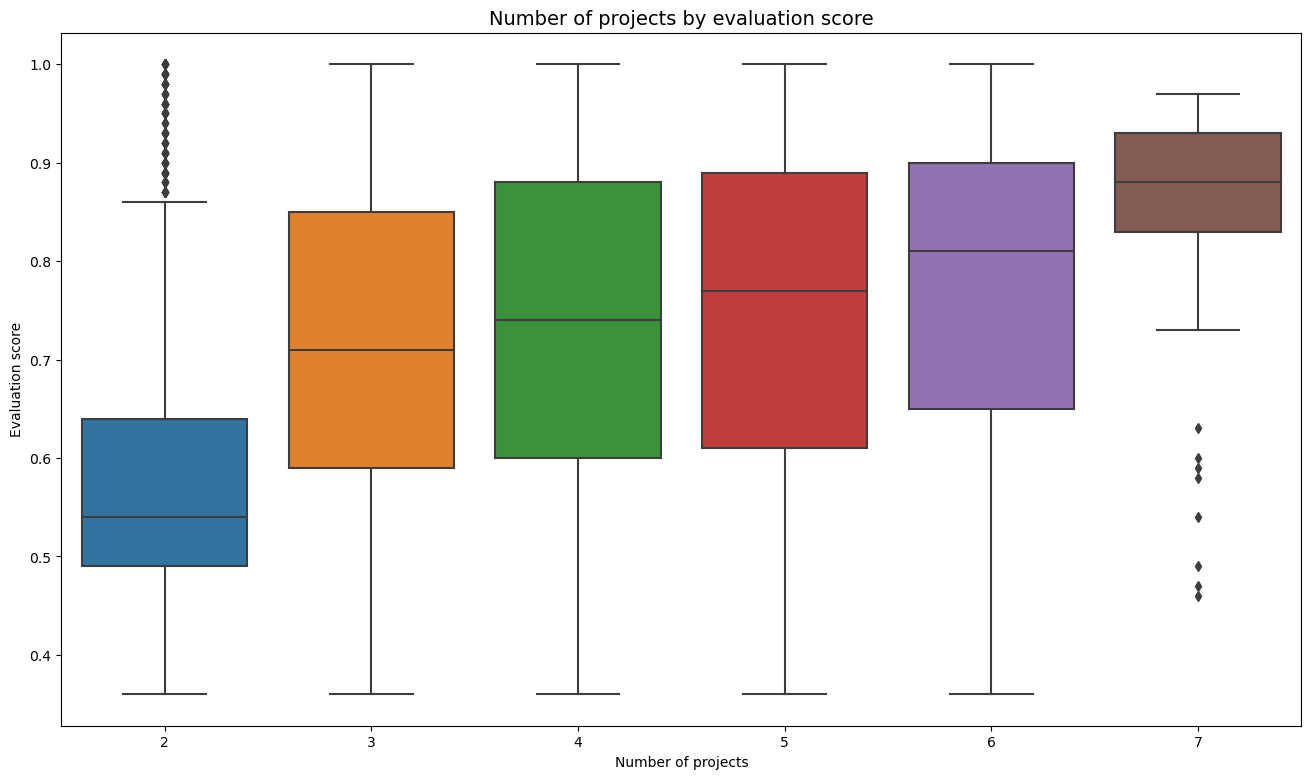

In [33]:
# Bivariate distribution: number of projects and evaluation score

plt.figure(figsize=(16, 9))
sns.boxplot(data=df1, x='number_project', y='last_evaluation')
plt.xlabel("Number of projects")
plt.ylabel("Evaluation score")
plt.title('Number of projects by evaluation score', fontsize='14')
plt.show()

As for the relationship between the number of projects an empoyee is responsible for and evaluation score, some insights have already been highlighted above. When it comes to the boxplot presented above, the overall upward trend reflecting on the positive correlation between the variables found with the help of the heatmap plot is quite apparent. The evaluation score of employees appears to increase as the number of the projects one is assigned to rises, thus making it possible to assume two possible scenarios: 1) the most intuitive explanation for such a trend would lie in more capable employees being assigned to more projects thus making evaluation score a representation of thier actual skills and work quality 2) alternatively, high evaluation scores recieved by employees handling a larger number of projects could be given out as a form of reward by the HR department trying to encourage hard working employees even if their actual skills are not as good and they were assigned to carry multiple projects from other reasons (in case, for instance, if new hires are the ones who get severly overworked and are forced to work longer hours/take up higher work load). 

Some outliers can be observed when it comes to employees handling `2 projects and 7 projects` at the same time. Additionally, while median evaluation scores of those handling `3-6 projects` are somewhat similar ranging from `0.7 to 0.8`, the median evaluation scores of the other two employee groups deviate from this baseline quite drastically dropping to `0.55` and raising to nearly `0.9`. 

### 3.2.3 Analyzing bivariate distributions

Moving forward, it is important to explore bivariate distributions that involve employee satisfaction since it is negatively correlated with churn (see group 2 in 3.1). To begin with, one can create a scatterplot showcasing the relationship between the average monthly work hours and employee satisfaction level, with the added color-code element separating the ones who ended up leaving the company and those who stayed to provide further insight into the differences between the two groups. 

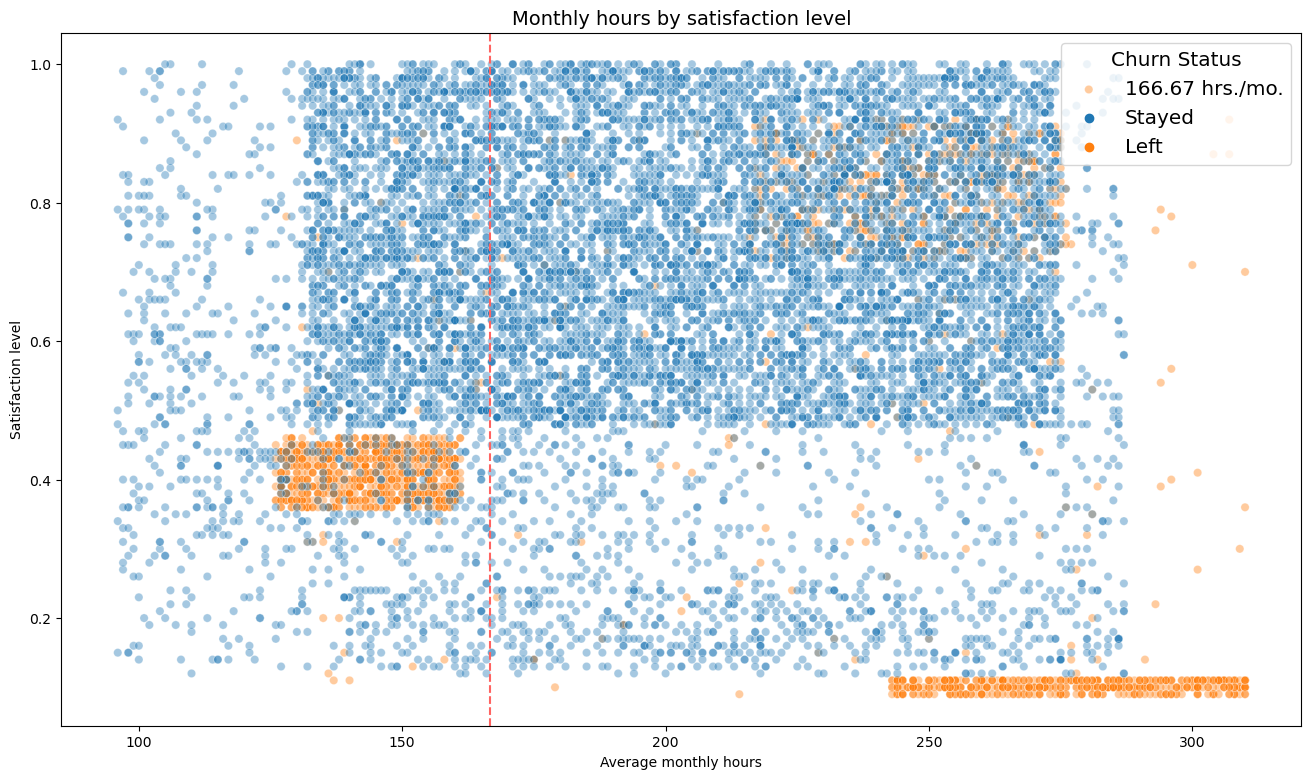

In [34]:
# Bivariate distribution: average monthly hours, satisfaction level and churn 

plt.figure(figsize=(16, 9))
sns.scatterplot(data=df1, x='average_monthly_hours', y='satisfaction_level', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')
plt.legend(labels = ['166.67 hrs./mo.','Stayed', 'Left'], title='Churn Status', fontsize='x-large', title_fontsize='x-large')
plt.xlabel("Average monthly hours")
plt.ylabel("Satisfaction level")
plt.title('Monthly hours by satisfaction level', fontsize='14')
plt.show()

Similarly, a dividing line can also be added to the plot visualizing the average number of monthly work hours an employee would be expected to have given an assumption of a work week of 40 hours and two weeks of vacation per year. As it can be seen, the majority of the surveyed employees worked a lot more (this those data points being displayed to the right of the divider). 

Largely, the employess who left the company (orange color dots) can be divided into three clusters:  

1. It can be noticed that there is an outstanding 'outlier' - a sizeable group of ex-employees who work `~240-315 hours per month`. 315 hours per month is over 75 hours per week for a whole year, or 15 hours a day. Among the employees with such a high workload the reported satisfaction levels are close to zero. It also has to be noted that when it comes to the orange data points that represent employees working over `~280-285` hours per month some of them had quite high satisfaction level, yet all of them still quit. This showcasing that burnout is a serious issue that can make employees consider leaving the company even if they are rather satisfied with their work. 

2. As for the second group of employees who left the company, those who had more normal working hours below average, had satisfaction level of still only around `0.4`. It remains unclear as to what the possible reasons behind their decision to leave could have posibly been (leading to the observed low satisfaction levels), although it can be speculated that they might have felt some pressure from both colleagues and HR personnel or ended up working less than other employees precisely because they were not satisfied with their job. 

3. Among the churned employees, the largest group observed on the plot are those employees who worked `~210-280 hours per month`, and had satisfaction levels ranging `~0.7-0.9` - higher than the other two groups. 

The strange overall shape of the distribution is similar to the one observed above.  

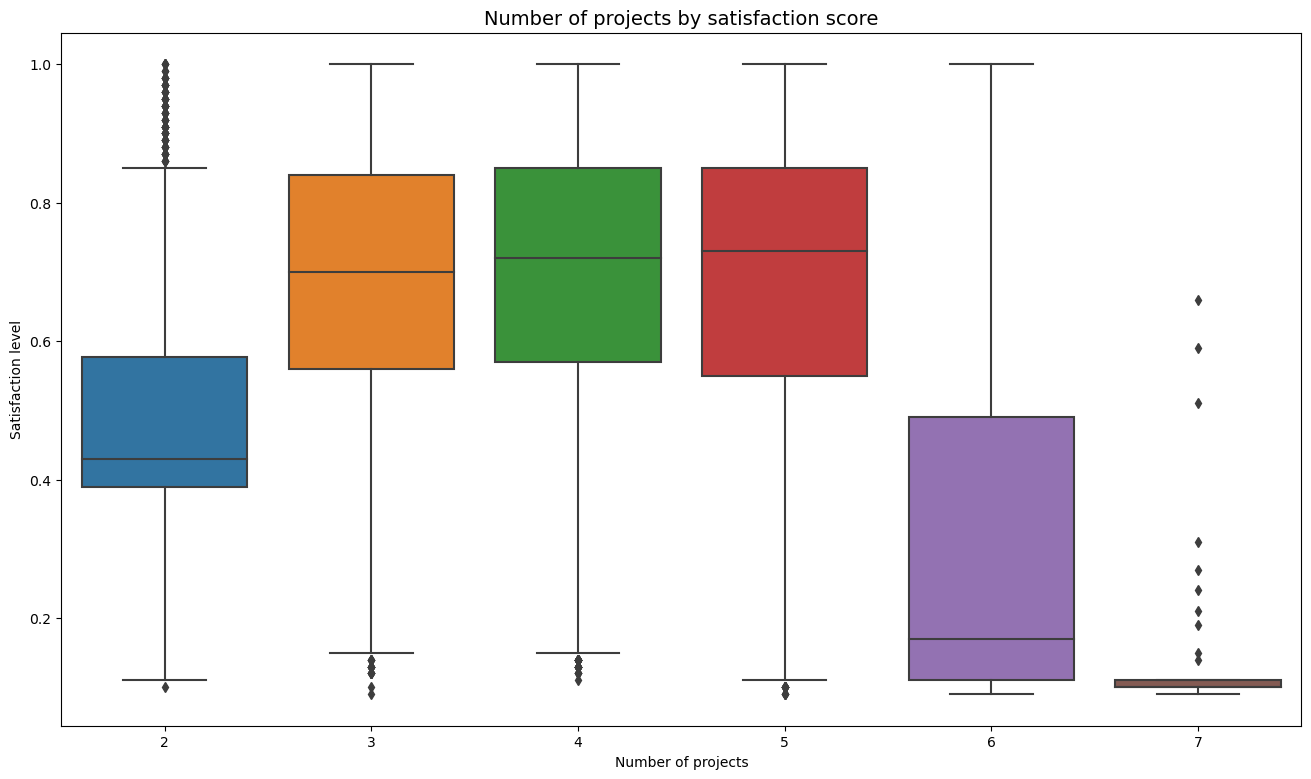

In [35]:
# Bivariate distribution: number of projects and satisfaction level 

plt.figure(figsize=(16, 9))
sns.boxplot(data=df1, x='number_project', y='satisfaction_level')
plt.xlabel("Number of projects")
plt.ylabel("Satisfaction level")
plt.title('Number of projects by satisfaction score', fontsize='14')
plt.show()

When it comes to the relationship between the number of projects an employee is handling and their satisfaction level, an interesting picture emerges: just as it was previously mentioned, the satisfaction level of employees working on two projects at the same time is rather abnormally low, followed by relatively high and stable satisfaction reported among employees handling from `3 to 5 projects` that plummets right after according to the figures reported by employees working on `6 and more projects`. Due to the fact that job satisfaction was found to be correlated to employee churn it is important to dig deeper into potential issues that are causing employees to be this dissatisfied with their job especially in case of those only working on `2 projects` (since the intuitive reason behind low job satisfaction of those handling 6 or more projects is their workload). Some of the proposed hypothesis can be found above and might be modified in what follows as a result of new findings contributing to our understanding of other underlying issues leading to low employee job satisfaction and churn. 

### 3.2.4 Analyzing bivariate distributions

The relationship between the satifsation levels of employees and their monthly average working hours appears to be quite apparent and the causal nature of it can be at least partially assumed in a sense that average working hours of an employee have an effect on how satisfied one is with their job. Moving on, it seems reasonable to explore a slightly different relationship between the two variables: job satisfction and tenure since at this point in our analysis it is important to dive deeper into all the potential factors that influence employee job satisfaction. Additionally, a weak correlation between churn and employee tenure was observed (see group 3 in 3.1), making the tenure variable worth exploring. 

Although not proven yet, it can be hypothsized that higher satisfaction levels are associated with longer tenure, making employees who are satisfied with their job stay working for the company for longer. Differences between those who left the company and those who decided to stay are to be studied as a sort of an interaction effect although some intuitive assumptions can be made in advance. It is important to remember, that while the correlation between employee satisfaction and churn was found to be positive, it was the opposite in the case of employee tenure which is rather counterintuitive. The analysis to follow might be capable to shed light on this discrepancy. 

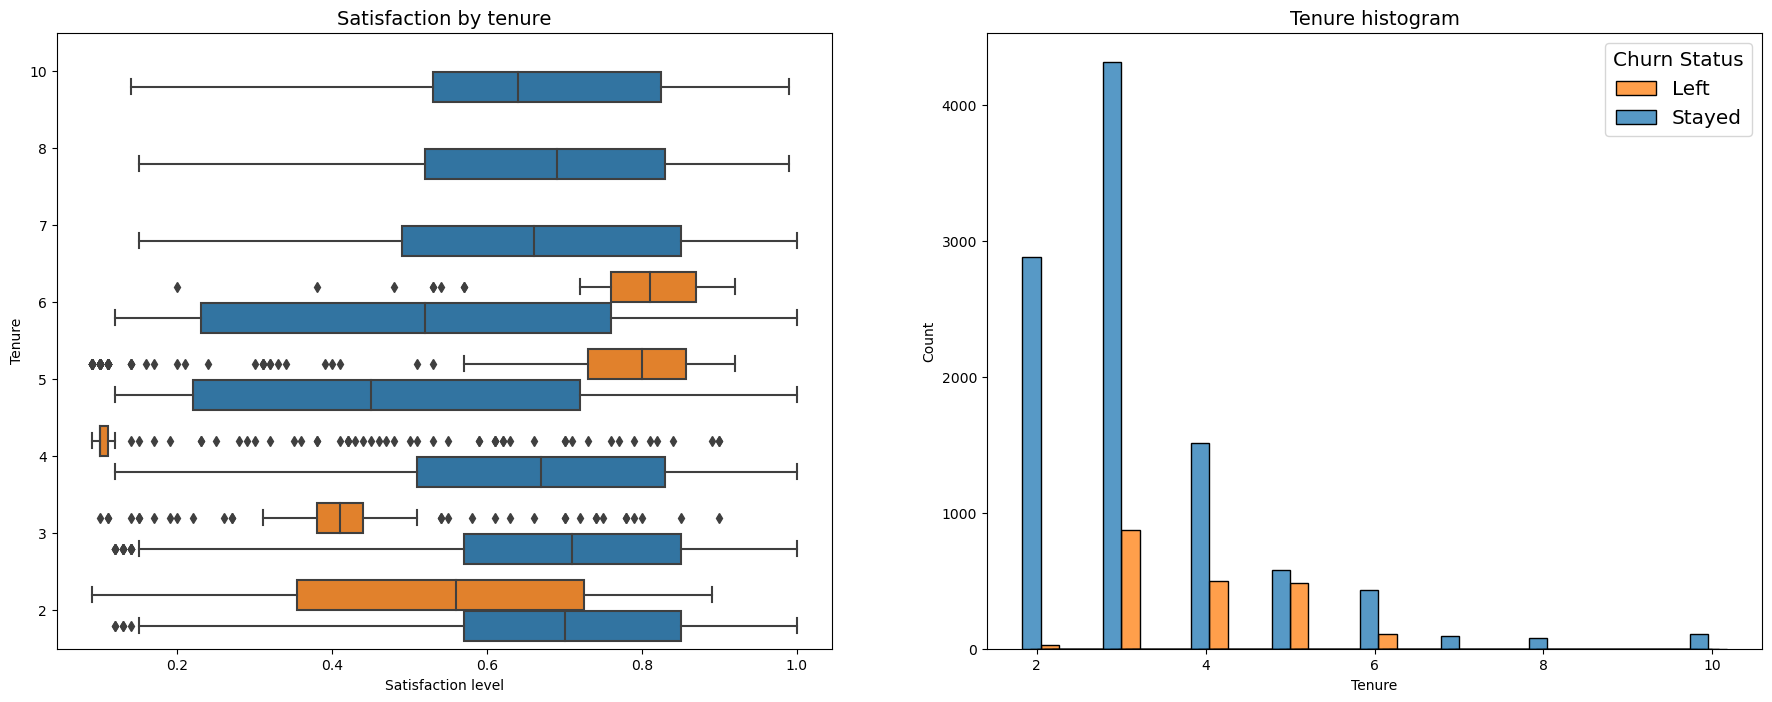

In [36]:
# Bivariate distribution: tenure, satisfaction level and churn 

# Separate entities representing different churn status
tenure_stay = df1[df1['left']==0]['tenure']
tenure_left = df1[df1['left']==1]['tenure']

# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Create boxplot showing distributions of `satisfaction_level` by tenure, comparing employees who stayed versus those who left
sns.boxplot(data=df1, x='satisfaction_level', y='tenure', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Satisfaction by tenure', fontsize='14')
ax[0].get_legend().remove()
ax[0].set(xlabel='Satisfaction level')
ax[0].set(ylabel='Tenure')

# Create histogram showing distribution of `tenure`, comparing employees who stayed versus those who left
sns.histplot(data=df1, x='tenure', hue='left', multiple='dodge', shrink=5, ax=ax[1])
ax[1].set_title('Tenure histogram', fontsize='14')
ax[1].set(xlabel='Tenure')
plt.legend(labels = ['Left', 'Stayed'], title='Churn Status', fontsize='x-large', title_fontsize='x-large')

plt.show()

Several observations can be made: 

1. As illustrated with the boxplot on the left, those employees who have left can be divided into two groups by large: those with lower satisfaction levels and shorter tenure and those who reported to be extremely satisfied with their job and had a bit of a longer tenure (although not the longest). 

2. There is a particular case that stands out: employees working for the company for `4 years` had extremely low satisfaction level.  Since the present graph does not provide enough context for any hypothesis to be made in this regard it is important to keep this discovery in mind and address it in what furthers, diging deeper into this particular issue. Could it possibly be that some of the tenure-based benefits are only offered to those who stayed at the company for more than 5 years, thus making employees with tenure of 4 years feel unsatisfied? 

3. No employees of tenure of `7 to 10 years` have left, while their satisfaction appeared to be similar to that of newly hired employees and those working for the company for `2-4 years` (those who stayed). 

4. As for the barchart on the right, it can be clearly seen that there are only a few employees of tenure longer than `6 years` which can potentially explain why satisfaction of those emoloyees were rather high and comparable to that of newly admitted employees: only those employees who feel like their job and the company are a parfect match to them stayed for this long. Alternatively, it can also possibly be the case that those now occupy higher status positions and arre paid better thus resulting in higher satisfaction reported. 

5. Majority of employees appear to have worked for the company in question for `2-4 years`. Although the number of employees leaving the company among those with tenure of 3, 4, and 5 years appears to be similar, it is important to remember that the share of those leaving compared to those staying would paint a drastically different picture illustrated below. 

In [37]:
# Calculate mean and median overall satisfaction scores of employees
print("Mean satisfaction score:", df1['satisfaction_level'].mean())
print("Median satisfaction score:", df1['satisfaction_level'].median())

Mean satisfaction score: 0.6296580768909951
Median satisfaction score: 0.66


In [38]:
# Calculate mean and median satisfaction scores of employees who left and those who stayed
df1.groupby(['left'])['satisfaction_level'].agg([np.mean,np.median])

mean  median
left                  
0     0.667365    0.69
1     0.440271    0.41

As it can be hypothesized intuitively, the mean and median satisfaction scores of employees who left are lower than those of employees who stayed and significantly lower than the overall figure (casual relationship is plausible but not necessary). As for the amployees who stayed, the mean satisfaction score appears to be slightly below the median score thus indicating that the distribution of satisfaction scores among those who stayed might be skewed to the left (negative skew). The hypothesis can be tested with the visualizations and calculations below. 

In [39]:
print("Skew of the distribution of satisfaction scores among employees staying", skew(df1[df1['left']==0]['satisfaction_level'], axis=0, bias=True))
print("Skew of the distribution of satisfaction scores among employees leaving", skew(df1[df1['left']==1]['satisfaction_level'], axis=0, bias=True))

Skew of the distribution of satisfaction scores among employees staying -0.6036817482082468
Skew of the distribution of satisfaction scores among employees leaving 0.28244733999908717


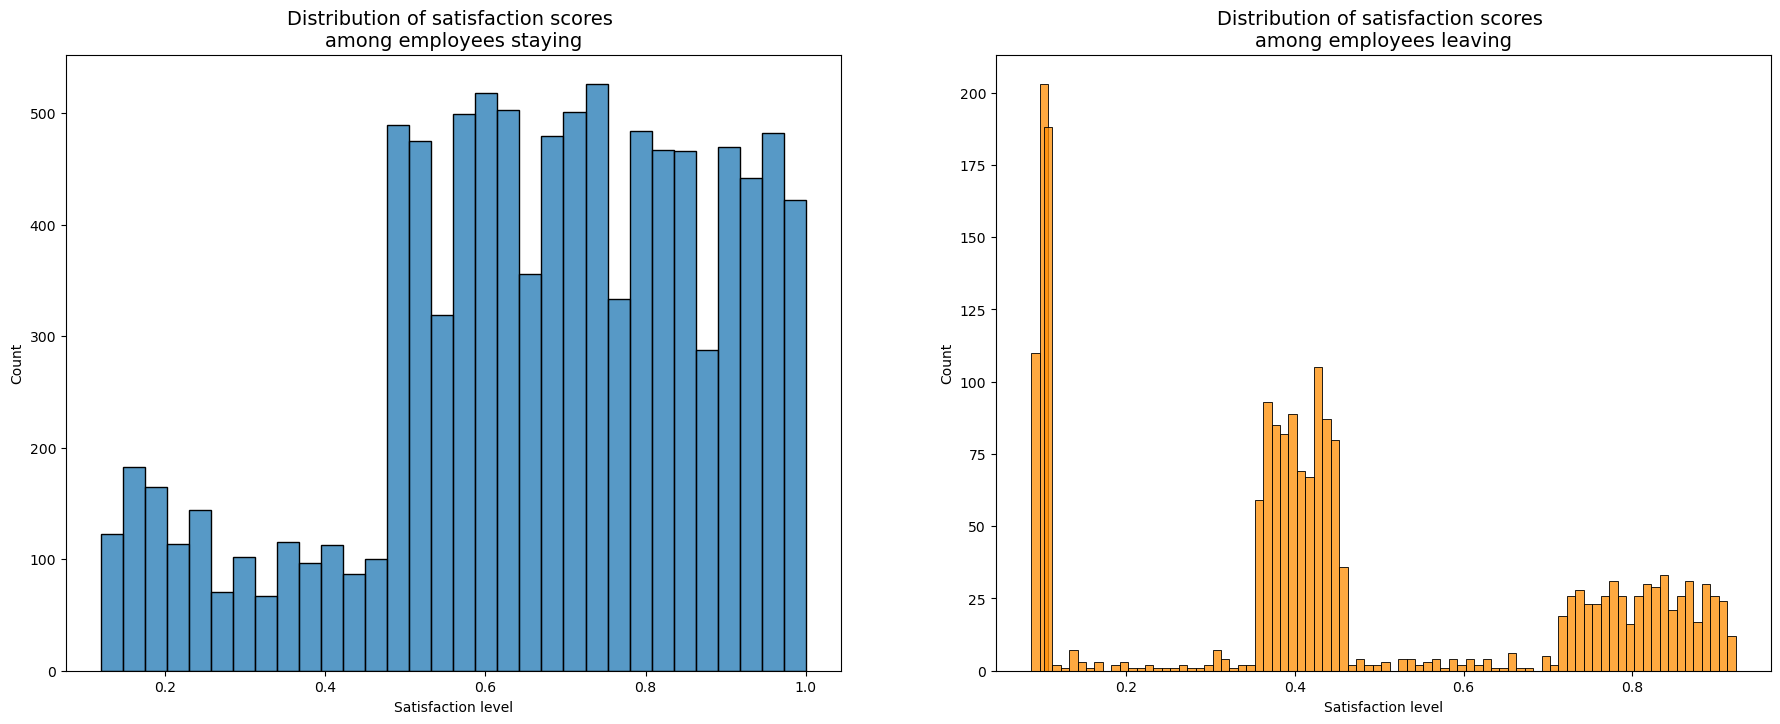

In [40]:
# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Create boxplot showing distribution of satisfaction scores among employees staying
sns.histplot(data=df1[df1['left']==0], x='satisfaction_level', ax=ax[0])
ax[0].set_title('Distribution of satisfaction scores \namong employees staying', fontsize='14')
ax[0].set(xlabel='Satisfaction level')
ax[0].set(ylabel='Count')

# Create histogram showing distribution of satisfaction scores among employees leaving
sns.histplot(data=df1[df1['left']==1], x='satisfaction_level', binwidth=0.005,  multiple='dodge',  color='darkorange', shrink=2, ax=ax[1])
ax[1].set_title('Distribution of satisfaction scores \namong employees leaving', fontsize='14')
ax[1].set(xlabel='Satisfaction level')

# Display the plots
plt.show()

It is interesting to note that while the distribution of reported satisfaction levels among those staying is a lot more normally distributed (despite the skew) than the one of those employees who left with the latter having three distinct subgroups discussed above. 

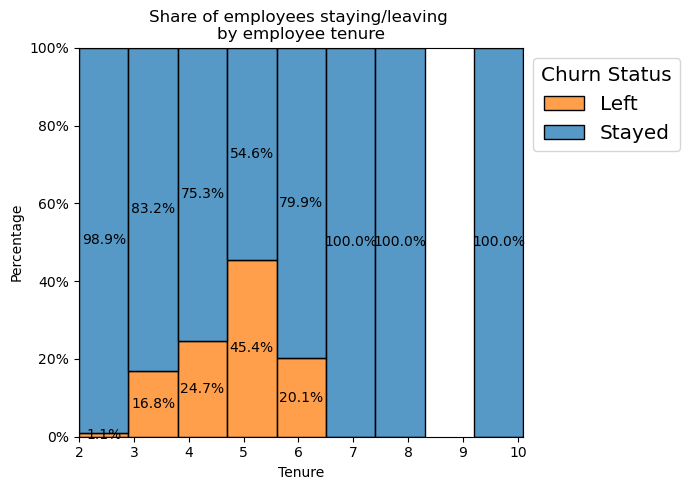

In [41]:
plt.figure(figsize=(7,5))

ax = sns.histplot(data=df1, x='tenure', hue='left', stat='probability', multiple = 'fill', binwidth=0.9)
ax.legend(labels = ['Left', 'Stayed'], title='Churn Status', fontsize='x-large', title_fontsize='x-large', 
          loc='upper left', bbox_to_anchor=(1, 1))
ax.set(xlabel='Tenure', ylabel='Percentage', title = 'Share of employees staying/leaving \nby employee tenure')

for bars in ax.containers:
    heights = [b.get_height() for b in bars]
    labels = [f'{h * 100:.1f}%' if h > 0.001 else '' for h in heights]
    ax.bar_label(bars, labels=labels, label_type='center')
    
ax.yaxis.set_major_formatter(PercentFormatter(1))
plt.tight_layout()

plt.show()

As it can be seen, the share of employees leaving the company among those working there for `5 years` is nearly 50/50 which is rather concerning compared to wider noticeable gaps in case of other tenure groups. In can be hypothesized that employees reporting extremely low satisfaction levels after staying with the company for 4 years end up staying for a bit longer thus reaching the 5-year-tenure point and quitting right after (either ending up not satisfied with the offered benefits or simply due to pent up stress/dissatisfaction).

In [42]:
# Calculate mean metrics by employee tenure overall
df1.groupby(['tenure']).agg({
    'satisfaction_level': 'mean',
    'last_evaluation': 'mean', 
    'average_monthly_hours': 'mean', 
    'number_project': 'mean',
    'promotion_last_5years': 'sum', 
    'work_accident': 'sum'
})

satisfaction_level  last_evaluation  average_monthly_hours  \
tenure                                                               
2                 0.699165         0.717986             199.850859   
3                 0.648988         0.684333             190.505780   
4                 0.516090         0.754354             215.950623   
5                 0.583183         0.791864             218.212806   
6                 0.571107         0.736439             208.448339   
7                 0.635957         0.682766             200.744681   
8                 0.665062         0.711975             193.802469   
10                0.655327         0.731495             199.224299   

        number_project  promotion_last_5years  work_accident  
tenure                                                        
2             3.684880                     39            500  
3             3.457803                     89            777  
4             4.423441                     22            276  
5             4.464218                     11            149  
6             4.167897                     11             88  
7             3.851064                     18             13  
8             3.777778                      5             22  
10            3.682243                      8             25

When it comes to employees who have been working for the company for `5 years`, it can be clearly seen that while the mean evaluation score metric is the highest compared to other tenure groups, such employees are also working the longest hours (`218.2`) and handling the largest number of projects (`4.46`). Despite such employees showcasing outstanding performance, it seems as if only a few have recieved promotion in the last 5 years (they entire time of staying at the company)- the actual shares of employee promotion will be explored in what follows. When it coems to the number work accidents, there seems to be a downward trend which also needs to be analyzed in terms of shares and not counts in what follows. 

In [43]:
# Calculate mean metrics by employee tenure and churn status
df1.groupby(['tenure', 'left']).agg({
    'satisfaction_level': 'mean',
    'last_evaluation': 'mean', 
    'average_monthly_hours': 'mean', 
    'number_project': 'mean',
    'promotion_last_5years': 'sum', 
    'work_accident': 'sum'
})

satisfaction_level  last_evaluation  average_monthly_hours  \
tenure left                                                               
2      0               0.700907         0.717603             199.742966   
       1               0.537419         0.753548             209.870968   
3      0               0.697020         0.717157             199.219416   
       1               0.411796         0.522243             147.475973   
4      0               0.637901         0.720444             198.607285   
       1               0.144505         0.857798             268.856566   
5      0               0.479121         0.702362             193.331034   
       1               0.708402         0.899564             248.153527   
6      0               0.513880         0.693025             200.050808   
       1               0.798440         0.908899             241.807339   
7      0               0.635957         0.682766             200.744681   
8      0               0.665062         0.711975             193.802469   
10     0               0.655327         0.731495             199.224299   

             number_project  promotion_last_5years  work_accident  
tenure left                                                        
2      0           3.681834                     39            499  
       1           3.967742                      0              1  
3      0           3.729379                     83            731  
       1           2.116705                      6             46  
4      0           3.912583                     21            248  
       1           5.981818                      1             28  
5      0           4.215517                     10            123  
       1           4.763485                      1             26  
6      0           4.057737                     11             84  
       1           4.605505                      0              4  
7      0           3.851064                     18             13  
8      0           3.777778                      5             22  
10     0           3.682243                      8             25

As for the differences between those who left and stayed among the 5-year tenured employees, there is a drastic difference in both the number of projects and average monthly hours reported with churned employees' work load being a lot larger. Such employees were also assessed higher when it came to the last employee evaluation (`0.89 > 0.7`). Interestingly enough, the satisfaction level of those who left was higher than that of employees staying. 

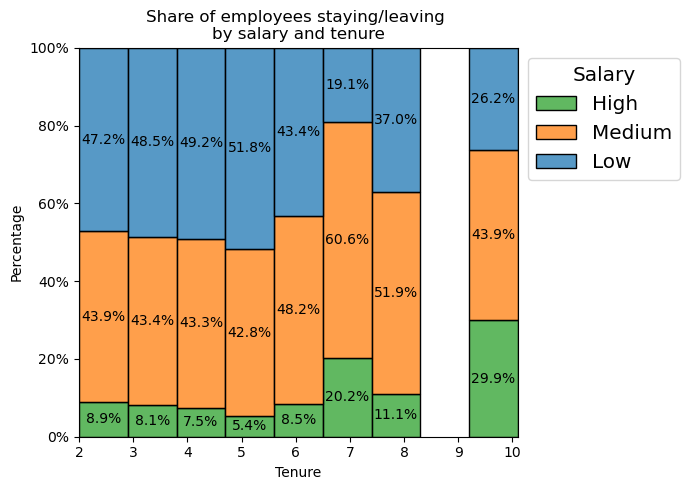

In [44]:
# Create stacked barchart to compare share of salary groups by the employee tenure
plt.figure(figsize=(7,5))
ax = sns.histplot(data=df1, x='tenure', hue='salary', stat='probability', multiple = 'fill', binwidth=0.9)
ax.legend(labels = ['High', 'Medium', 'Low'], title='Salary', fontsize='x-large', title_fontsize='x-large', 
          loc='upper left', bbox_to_anchor=(1, 1))
ax.set(xlabel='Tenure', ylabel='Percentage', title = 'Share of employees staying/leaving \nby salary and tenure')

for bars in ax.containers:
    heights = [b.get_height() for b in bars]
    labels = [f'{h * 100:.1f}%' if h > 0.001 else '' for h in heights]
    ax.bar_label(bars, labels=labels, label_type='center')
    
ax.yaxis.set_major_formatter(PercentFormatter(1))
plt.tight_layout()
plt.show()

As for the salary, since it could potentially be one of the reason behind 5-year-tenured employees leaving the company, it is notable that this group has the largest share of low-paid emploess and the lowest share of those who are paid high wages. It is also important to note both groups or `7-year and 10-year` tenured employees having a way more favorable distribution of wages with the second-to-highest and highest share of highly paid employees accordingly. None of the emplyees from these two groups churned. Interestingly, the satisfaction score of those employees working for the company for `8 years was` slightly higher than it was in those two groups (0.66 > 0.63 and 0.65) which can be attributed to the fact that their average monthly hours where lower than those of the other two groups (193.8 < 200.7 and 199.2). Since the mean number of projects handled by employees in the `8-year group` was actually higher than that of `10-year employees` (3.77 > 3.68) it could be possible that the average monthly work hours as a factor has more weight in determining one's satisfaction level. The hypothesis would need a lot more additional information to be proven right since the average number of projects handled by 7-year tenured employees is higher than that that of 8-year employees making it hard to dervie to a single universal rule or conclusion. 

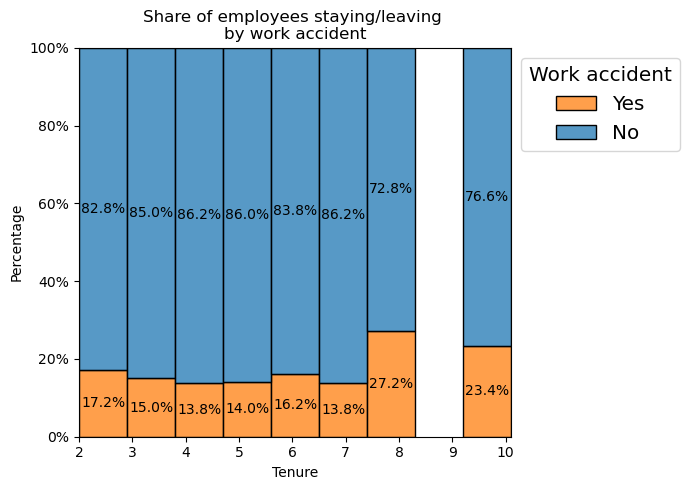

In [45]:
# Create stacked barchart to compare share of work accidents by the employee tenure
plt.figure(figsize=(7,5))
ax = sns.histplot(data=df1, x='tenure', hue='work_accident', stat='probability', multiple = 'fill', binwidth=0.9)
ax.legend(labels = ['Yes', 'No'], title='Work accident', fontsize='x-large', title_fontsize='x-large', 
          loc='upper left', bbox_to_anchor=(1, 1))
ax.set(xlabel='Tenure', ylabel='Percentage', title = 'Share of employees staying/leaving \nby work accident')

for bars in ax.containers:
    heights = [b.get_height() for b in bars]
    labels = [f'{h * 100:.1f}%' if h > 0.001 else '' for h in heights]
    ax.bar_label(bars, labels=labels, label_type='center')
    
ax.yaxis.set_major_formatter(PercentFormatter(1))
plt.tight_layout()
plt.show()

Interestingly, the 5-year-tenured employess don't have an outstanding share of accidents, while it is the `7-year and 10-year` tenured employees who have reported a relatively large number of accidents happening which appears to be somewhat counterintuitive given it could be assumed that an employee would be prone to reporting less accidents as their tenue increases due to their growing familiarity with the job. 

However, it can be recalled that mean tenure of those handling more projects was higher than the rest making it possible to explain the observed share of work accidents by a simple fact that employees from these two groups have more work to handle which can result in their work life being rather chaotic leading to work accidents. The picture changes when we take a look at the summary table above: it's actually `4-year to 6-year` tenured employee groups that have reported the highest mean number of projects handled per employee. The same goes for their average monthly work hours. Thus, it seems like the provided dataset lacks information that would be required to arrive at a conclusion as to why `7 and 10-year` tenured employees report such a big number of accidents. 

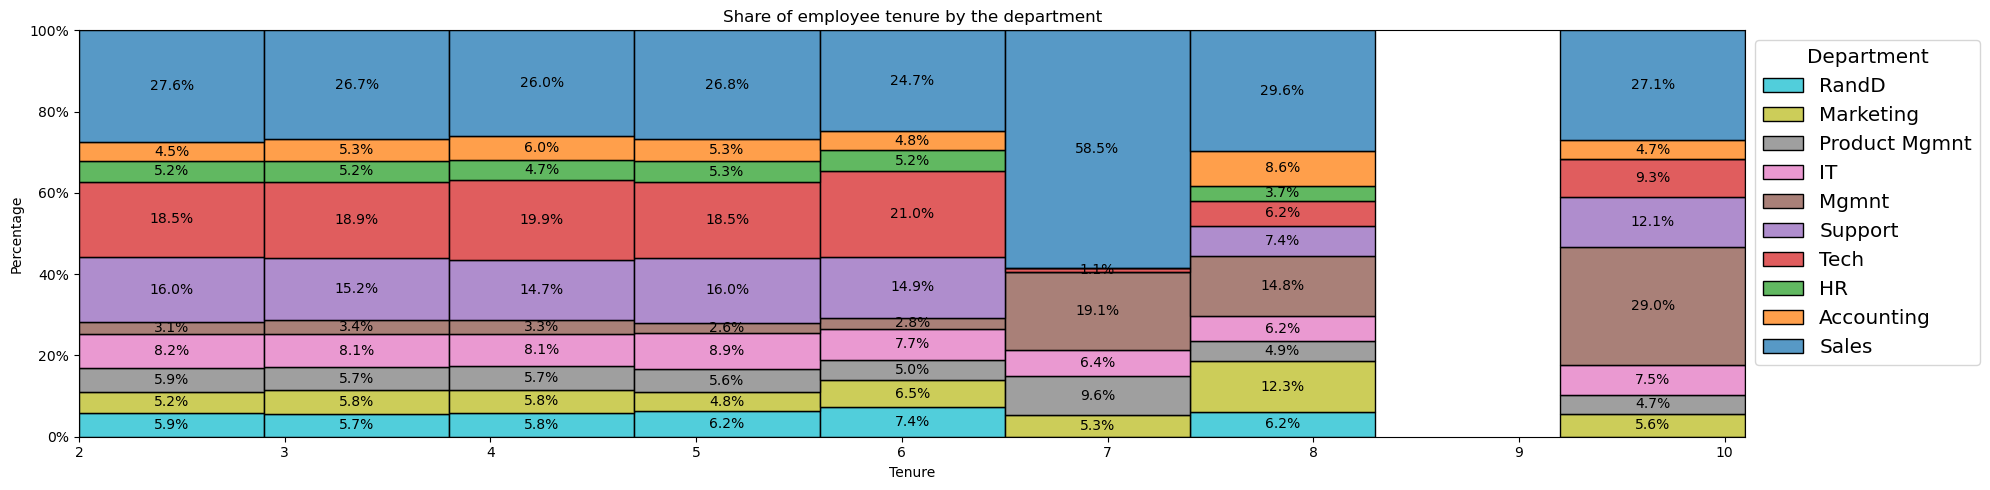

In [46]:
# Create stacked barchart to compare department share of employee tenure
plt.figure(figsize=(20,5))
ax = sns.histplot(data=df1, x='tenure', hue='department', stat='probability', multiple = 'fill', binwidth=0.9)
ax.set(xlabel='Tenure', ylabel='Percentage', title = 'Share of employee tenure by the department')
ax.legend(labels = ['RandD', 'Marketing', 'Product Mgmnt', 'IT', 'Mgmnt', 'Support', 'Tech', 'HR', 'Accounting', 'Sales'], title='Department', fontsize='x-large', title_fontsize='x-large', 
          loc='upper left', bbox_to_anchor=(1, 1))

for bars in ax.containers:
    heights = [b.get_height() for b in bars]
    labels = [f'{h * 100:.1f}%' if h > 0.001 else '' for h in heights]
    ax.bar_label(bars, labels=labels, label_type='center')
    
ax.yaxis.set_major_formatter(PercentFormatter(1))
plt.tight_layout()
plt.show()

As it can be seen, when it comes to those employess who have been working for the company for `5 years` the department-distribution seems to be rather similar to other tenure groups. The only tenure group that stands out the most is that of `7-year-tenured employees` with the sales department employees representing more than half of the whole group. Addionally, almost no employees from the Tech and RandD department are included. When it comes to the similarities between the 7-year and 10-year tenured groups, it can be noticed that both have a rather large share of employees from the management depatment (a rather large share is also occupied by this depetment among the `8-year-tenured employee group`). A deep dive into the department variable is to follow. 

It is important to note that the three salary categories were predefined for the present dataset thus emposing limits on the discovery of potentially more valuable insights and precise predictions (that could have been made if the variable was kept continious). The fact that the variable was factorized could potentially be due to the fact that employee salary has to be kept confidential or, alternatively, due to the fact that it was concluded as a result of aa EDA conducted by the dataset creators in advance that the project (or the models to follow) could not benefit from keeping the variable in it's original numeric form or its factorized form made it significantly easier to work with. It could be also possible that when the survey was distributed to the employees the three present factor levels were the exact ones respondents got to choose from and were not asked to report their actual salary. If the latter is the case then it could potentially be problematic because it is rather quetionable if an employee can accurately assess heir salary relative to other workers of the same company due to the fact that such information is more often not shared neither between the employees nor by the HR department. Thus, due to the issues discussed above, even if employee salary could potentially be a strong predictor of one's decision to leave the company, some of it's predictive power could be lost. 

### 3.2.5 Analyzing bivariate distributions

A yet another variable that can both serve as an indicator of one's performance assessment and a potential predictor of an employee staying or leaving the company is their promotion rate. The promotion rate can be plotted together with either working hours, number of projects handled or evaluation scores since all of these variables can be hypothesized to be positively correlated. Additionally, it can be beneficial to look into the relationship between the promotion variable and employee tenure: among long-tenured employees the lack of promotion could potential become a valid reason for them to consider quitting. 

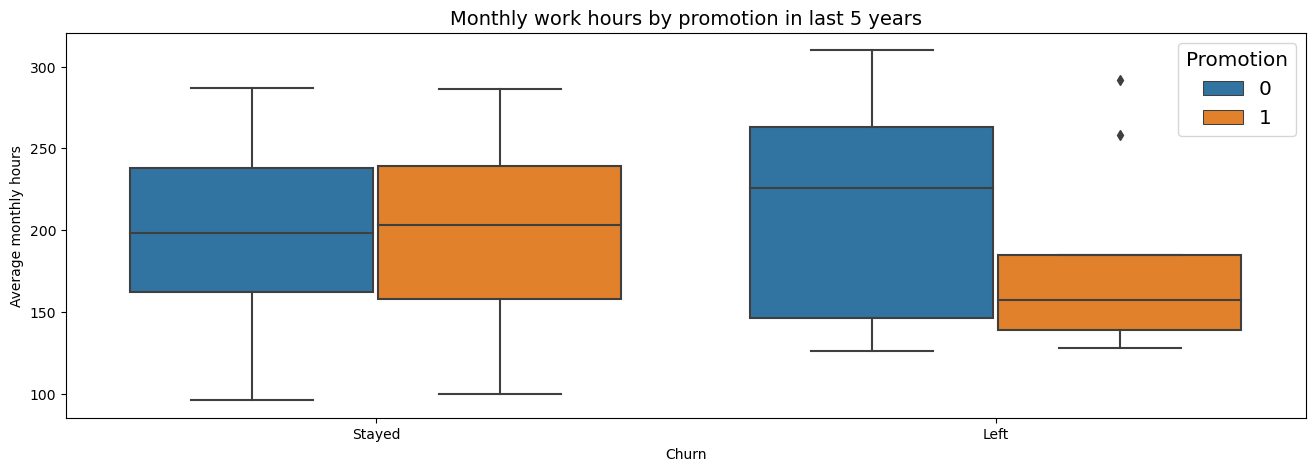

In [47]:
# Bivariate distribution: average monthly hours, promotion in the last 5 years and churn (boxplot)

plt.figure(figsize=(16, 5))
plt.title('Monthly work hours by promotion in last 5 years', fontsize='14')
ax = sns.boxplot(data=df1, x='left', y='average_monthly_hours', hue = 'promotion_last_5years')
ax.legend(title='Promotion', fontsize='x-large', title_fontsize='x-large')
ax.set_xticklabels(["Stayed", "Left"])
ax.set(xlabel="Churn", ylabel = "Average monthly hours")
plt.show()

As it can be seen, there is hardly any difference between the two box plots on the left - the ones signifying those employees who stayed at the company. The median monthly work hours seem to be almost the same regardless of whether an employee got a promotion or not. When it comes to those employees who did quit, on the other hand, the gap is shocking. The median monthly work hours is a lot smaller for those who did get a promotion which seems somewhat counterintuitive. However, it is important that the promotion variable indicates whether an employee has had a promotion in the last five years which is a rather long period of time and thus the direct correlation with average monthly work hours is rather dubious. 

It might be helpful to display the variables in question in a different way. 

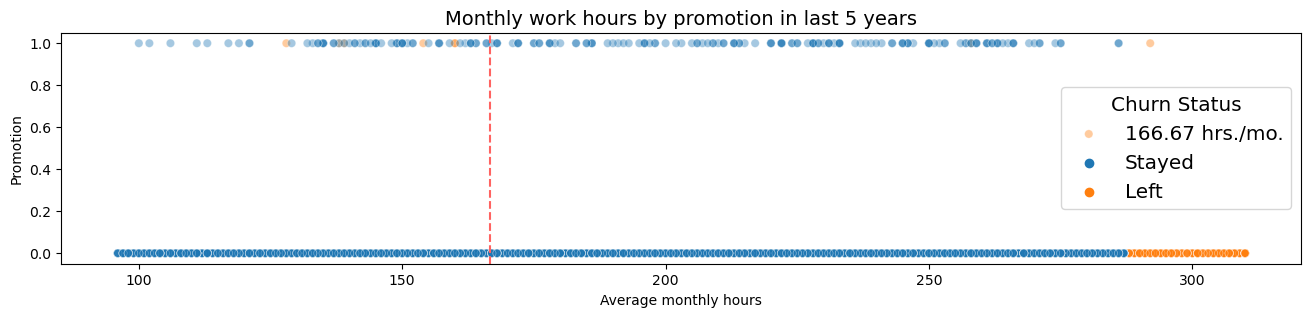

In [48]:
# Bivariate distribution: average monthly hours, promotion in the last 5 years and churn (scatteplot)

plt.figure(figsize=(16, 3))
sns.scatterplot(data=df1, x='average_monthly_hours', y='promotion_last_5years', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', ls='--')
plt.legend(labels = ['166.67 hrs./mo.','Stayed', 'Left'], title='Churn Status', fontsize='x-large', title_fontsize='x-large')
plt.title('Monthly work hours by promotion in last 5 years', fontsize='14')
plt.xlabel("Average monthly hours")
plt.ylabel("Promotion")
plt.show()

Several conclusions can be drawn using the plot above:

1. Now it is a lot more apparent that almost no employees who have been promoted in the last 5 years left the company. However, when it comes to those who did quit, those were the ones whose monthly work hours exceeded the critical limit of `280-285` discussed previously. 

2. The reason for the confusion caused by the previous plot is now also apparent: it is indeed true that among those employees who were promoted in the last 5 years and still left the company there seems to be more employees who reported a rather low figure of average monthly work hours with that being even below the `166.67` threshold. 

3. However, interstingly enough, it can be observed that mostly employees who worked only up to 275 hours per month were promoted, with there being only two cases of employees being promoted while working more. The only promoted overworked employee staying reported working for around `280 hours per month`, one employee who got a promotion while working for around `285 hours per month` left, and the rest of the employees who worked `over 285 hours per month` were not promoted and left. It could be plausible those they felt like they weren't compensated enough given how much work they had to handle. 


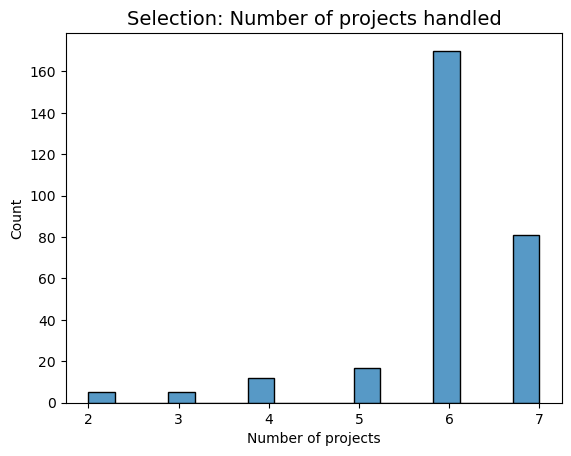

In [49]:
# Bivariate distribution: average monthly hours, promotion in the last 5 years, churn and number of projects

sns.histplot(data=df1[(df1['promotion_last_5years']==0) & (df1['average_monthly_hours']>275) & (df1['left']==1)], x='number_project', multiple='dodge')
plt.title('Selection: Number of projects handled', fontsize='14')
plt.xlabel("Number of projects")
plt.ylabel("Count")
plt.show()

The plot above was built by selecting a very specific group of employees using the following criteria: 1) Has left the company 2) Was not promoted in the last `5 years` 3) Monthly work hours reported to be above `275`. By filtering out this particular group discovered with the help of the previous visualization we can have a closer look at some other variables that might have contributed to these prople deciding to quit the company in the end. The hypothesis could be the following: despite the positive correlation between the number of projects handled by an employee and reported monthly work hours, it could be the case that these employees simply didn't get a promotion because despite their work hours being extremely high they actually only worked on a few projects and were simply very slow with their work. However, the new graph proved the opposite: the majority of employees in this particular group were working on 6 projects at the same time, thus making it unclear why they have not been promoted and allowing us to hypothesize that the could have made the decision to quit the company precisely because they felt like they weren't rewarded for their hard work enough. 

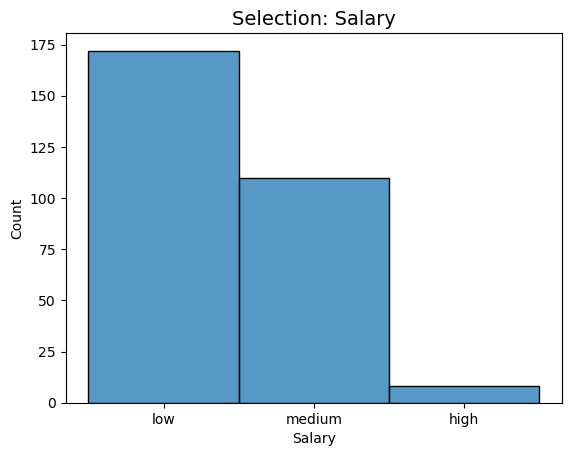

In [50]:
# Bivariate distribution: average monthly hours, promotion in the last 5 years, churn and salary

sns.histplot(data=df1[(df1['promotion_last_5years']==0) & (df1['average_monthly_hours']>275) & (df1['left']==1)], x='salary', multiple='dodge', binwidth=0.6)
plt.title('Selection: Salary', fontsize='14')
plt.xlabel("Salary")
plt.ylabel("Count")
plt.show()

Following the same logic, it could also be hypothesized that the fact that the majority of such employees had low salary could also be one of the reasons they decided to quit due to the lack of overall compensation for their work. 

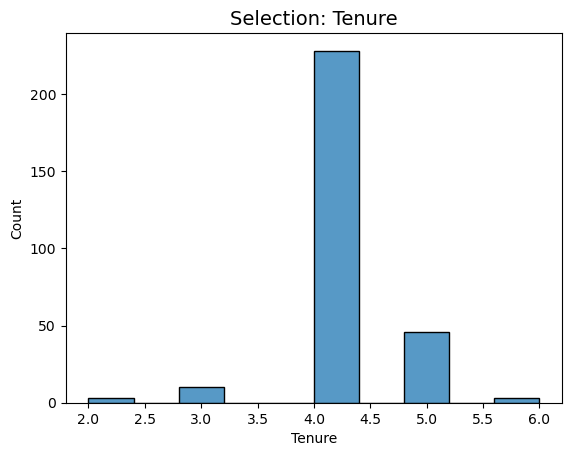

In [51]:
# Bivariate distribution: average monthly hours, promotion in the last 5 years, churn and tenure

sns.histplot(data=df1[(df1['promotion_last_5years']==0) & (df1['average_monthly_hours']>275) & (df1['left']==1)], x='tenure', multiple='dodge')
plt.title('Selection: Tenure', fontsize='14')
plt.xlabel("Tenure")
plt.ylabel("Count")
plt.show()

However, if we look at the tenure of such employees, it becomes rather apparent that the reason why they were not promoted in the last 5 years could easily be due to the fact that the majority of them have only worked for the company for 4 years. Potentially, it could be assumed that it is rather hard to get a promotion within the first four years of working for a company.

In [52]:
# Calculate mean and median tenure of employees who were promoted and not
df1.groupby(['promotion_last_5years'])['tenure'].agg([np.mean,np.median])

mean  median
promotion_last_5years                  
0                      3.354937     3.0
1                      3.940887     3.0

Mean and median tenure of those employees who were promoted in the last 5 years paint quite a different picture: it is indeed possible to get promoted even within the first 4 years of staying at the company given the mean figure amounting to 3.9. 

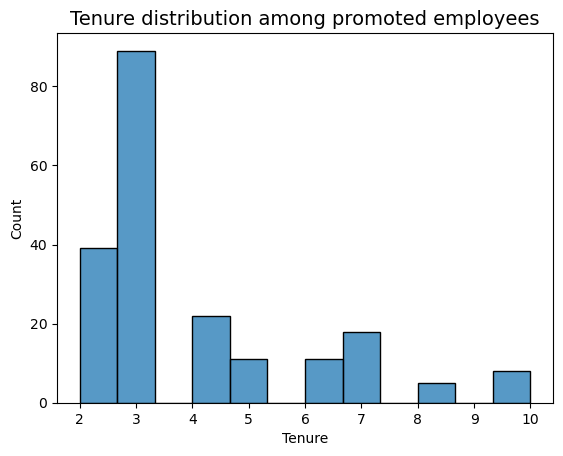

In [53]:
sns.histplot(data=df1[df1['promotion_last_5years']==1], x='tenure')
plt.title('Tenure distribution among promoted employees', fontsize='14')
plt.xlabel("Tenure")
plt.ylabel("Count")
plt.show()

The distribution of tenure among those employees who got a promotion within the last 5 years even shows that the majority of such employees only worked here for 3 years. Thus, the hypothesis made above in regards to the possibiliy of employees who quit reporting no promotion within the last 5 years despite being overworked feeling not compensated for their hard work fairly (no promotion, low salary, handling many projects at the same time, working long hours) can be considered quite high. 

### 3.2.6 Analyzing bivariate distributions

Naturally, it can be assumed that distribution of all of the dataset variables would be at least somewhat different in different departments. As for employee churn, if any of the departments have a particularly high share of employees leaving it would require particular attention from the HR department and call for measures to be taken to solve the issues. 

In [54]:
# Display counts for each department
df1["department"].value_counts()

sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: department, dtype: int64

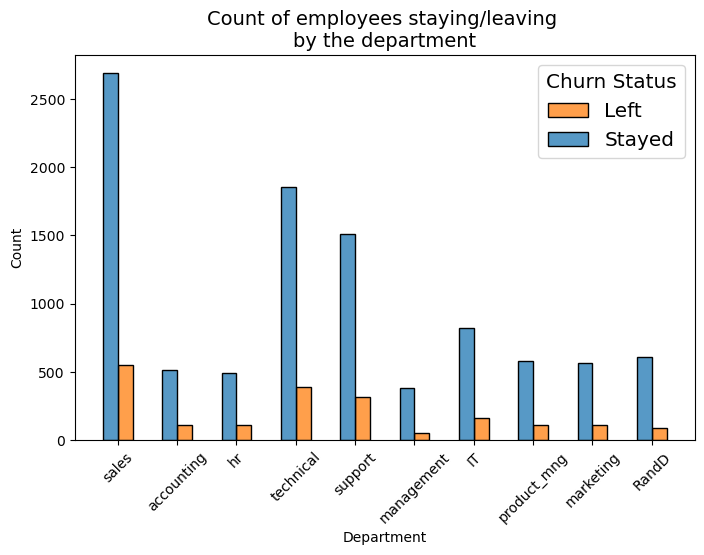

In [55]:
# Create histogram to compare department distribution of employees who left to that of employees who didn't
plt.figure(figsize=(8,5))
sns.histplot(data=df1, x='department', hue='left', discrete=1, 
             hue_order=[0, 1], multiple='dodge', shrink=.5)
plt.xticks(rotation='45')
plt.title('Count of employees staying/leaving \nby the department', fontsize=14)
plt.legend(labels = ['Left', 'Stayed'], title='Churn Status', fontsize='x-large', title_fontsize='x-large')
plt.xlabel("Department")

plt.show()

While the present graph can also behelpful, it makes it rather hard to make comparisons between the departments due to the difference in the number of peoople working at each. Additionally, even if the gap between the number of employees who churned at the sales depertment and those who didn't seems to be quite large it is almost impossible to say whether it is actually larger or smaller than other percieved gaps on the plot. Thus, we switch to building a stacked barchart instead. 

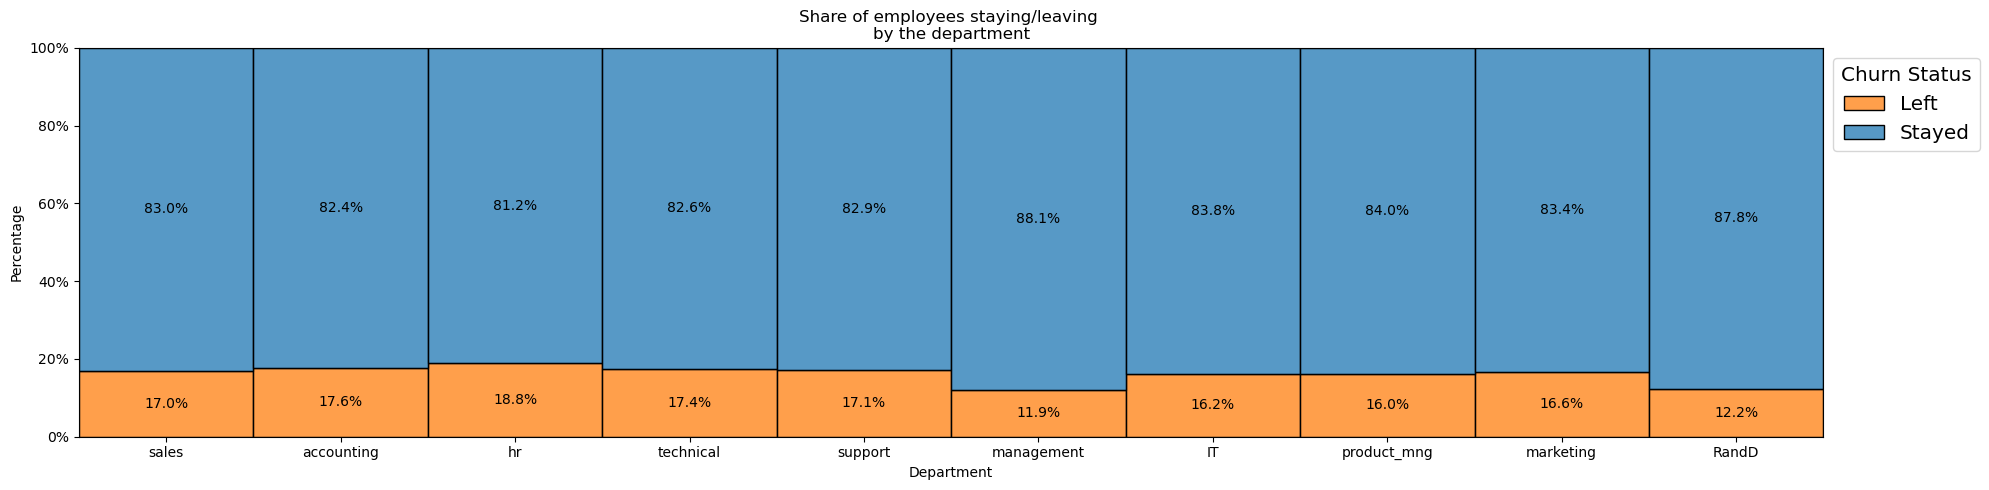

In [56]:
# Create stacked barchart to compare department share of employee churn
plt.figure(figsize=(20,5))
ax = sns.histplot(data=df1, x='department', hue='left', stat='probability', multiple = 'fill', binwidth=0.9)
ax.legend(labels = ['Left', 'Stayed'], title='Churn Status', fontsize='x-large', title_fontsize='x-large', 
          loc='upper left', bbox_to_anchor=(1, 1))
ax.set(xlabel='Department', ylabel='Percentage', title = 'Share of employees staying/leaving \nby the department')

for bars in ax.containers:
    heights = [b.get_height() for b in bars]
    labels = [f'{h * 100:.1f}%' if h > 0.001 else '' for h in heights]
    ax.bar_label(bars, labels=labels, label_type='center')
    
ax.yaxis.set_major_formatter(PercentFormatter(1))
plt.tight_layout()
plt.show()

Now the difference in the share of employees who left to those who stayed is a lot more apparent and easily comparable between the departments. For instance, it can be seen that despite the share of employees quitting is rather similar across all the departments, the management and RandD department have a slightly larger share of employees staying. Whether or not this difference from other departments is random can be checked with the use of statistical tests futher along. Additionally, while creating a predictor variable out of the initial department variable, one can transform it into a binary variable indicating whether an employee belongs to the management or RandD department or not. 

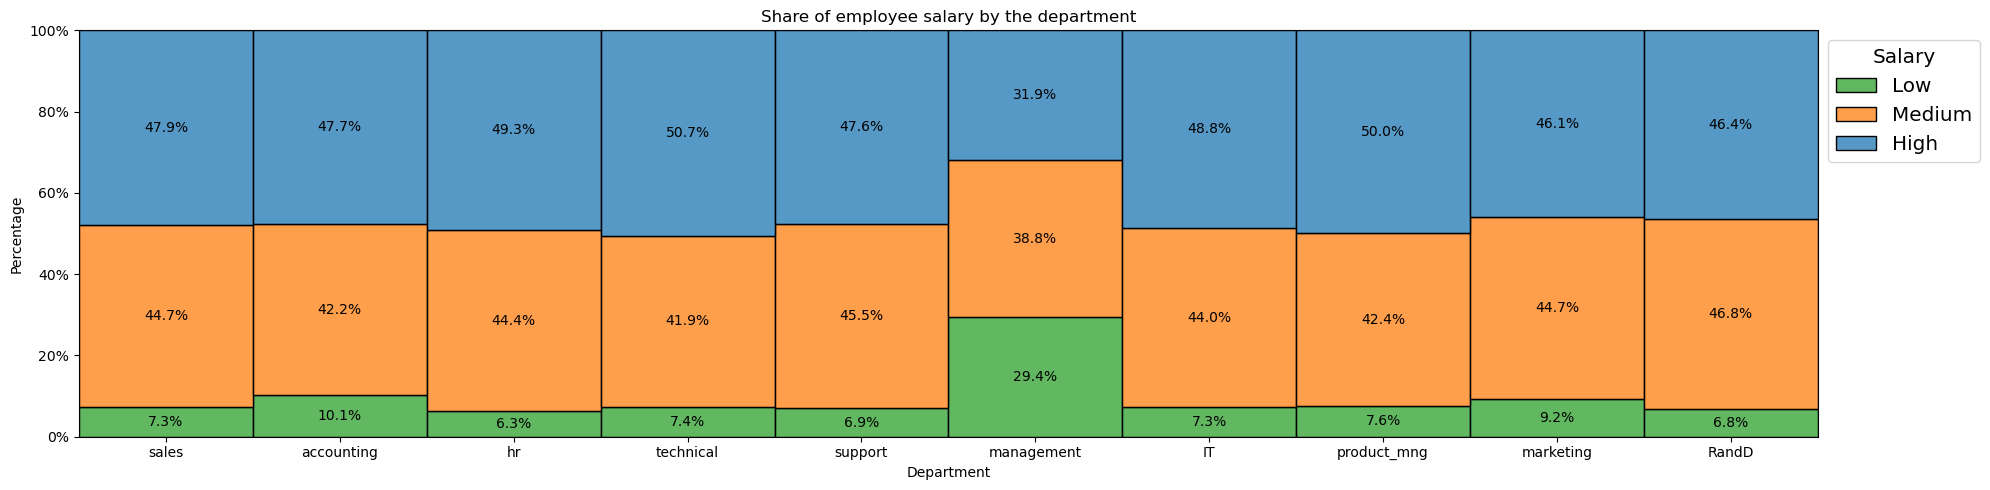

In [57]:
# Create stacked barchart to compare department share of employee salary classes 
plt.figure(figsize=(20,5))
ax = sns.histplot(data=df1, x='department', hue='salary', stat='probability', multiple = 'fill', binwidth=0.9)
ax.legend(labels = ['Low', 'Medium', 'High'], title='Salary', fontsize='x-large', title_fontsize='x-large', 
          loc='upper left', bbox_to_anchor=(1, 1))
ax.set(xlabel='Department', ylabel='Percentage', title = 'Share of employee salary by the department')

for bars in ax.containers:
    heights = [b.get_height() for b in bars]
    labels = [f'{h * 100:.1f}%' if h > 0.001 else '' for h in heights]
    ax.bar_label(bars, labels=labels, label_type='center')
    
ax.yaxis.set_major_formatter(PercentFormatter(1))
plt.tight_layout()
plt.show()

As the graph showcases, the management department is actually the only one that seems to have a rather equal distribution of salary levels especially compared to other departments. Even though this equality is reached by having more employees recieving low salary, it could still potentially promote more overal pleasant work atmosphere contrary to other departments where low-paid employees can feel disadvantaged and not rewarded for their work enough.

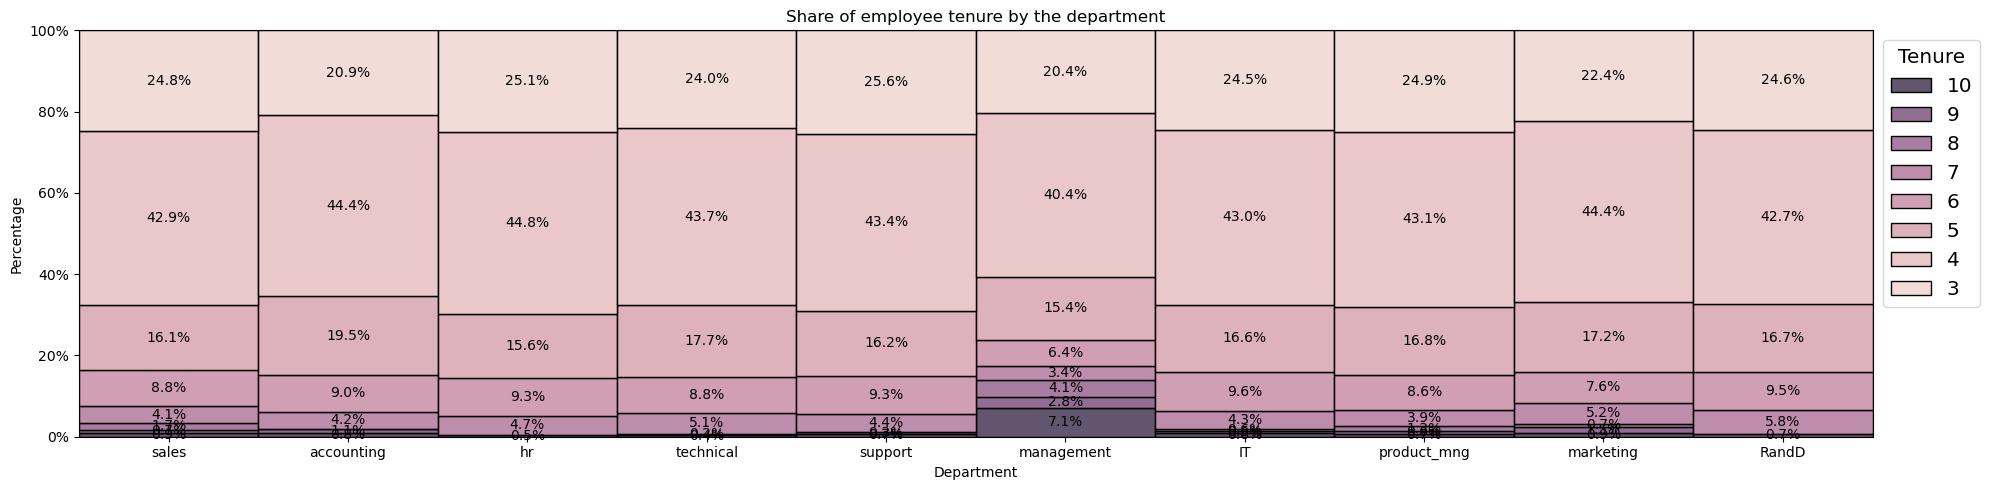

In [58]:
# Create stacked barchart to compare department share of employee tenure
plt.figure(figsize=(20,5))
ax = sns.histplot(data=df1, x='department', hue='tenure', stat='probability', multiple = 'fill', binwidth=0.9)
ax.set(xlabel='Department', ylabel='Percentage', title = 'Share of employee tenure by the department')
ax.legend(labels = ['10', '9', '8', '7', '6', '5', '4', '3', '2'], title='Tenure', fontsize='x-large', title_fontsize='x-large', 
          loc='upper left', bbox_to_anchor=(1, 1))

for bars in ax.containers:
    heights = [b.get_height() for b in bars]
    labels = [f'{h * 100:.1f}%' if h > 0.001 else '' for h in heights]
    ax.bar_label(bars, labels=labels, label_type='center')
    
ax.yaxis.set_major_formatter(PercentFormatter(1))
plt.tight_layout()
plt.show()

Similarly, management department seems to stand out when it comes to employee tenure distribution:: it has a lot more long-tenured employees working for the company for 10 years. This goes somewhat contrary to the previous discovery made since it could be expected to see a larger share of employees getting paid a higher salary. However, a larger number of long-tenured employees can also contribute to a lower turnover rate: those staying working for the same company for 10 years are rather unlikely to quit. Since that is the case, it can also be expected to see the satisfaction levels of management department employees be a bit higher. 

In [59]:
# Calculate mean satisfaction and evaluation scores of employees from different departments
df1.groupby(['department']).agg({
    'satisfaction_level': 'mean',
    'last_evaluation': 'mean'
})

satisfaction_level  last_evaluation
department                                      
IT                     0.634016         0.715051
RandD                  0.627176         0.712983
accounting             0.607939         0.721900
hr                     0.621947         0.715691
management             0.631995         0.726307
marketing              0.634770         0.718440
product_mng            0.629825         0.713790
sales                  0.631349         0.710398
support                0.634822         0.722998
technical              0.627937         0.719791

Interstingly enough, management department doesn't have the highest mean satisfaction level among its employees: it falls behind the IT, marketing and support departments. However, it also doesn't occupy the lowest position neither: RandD, accounting, HR, product management, sales, and technical departments have lower average satisfaction scores. As for the mean employee evaluation scores, the management department ranks the highest. It could be assumed that given the higher share of low-paid employees the mean evaluation score would be lower showcasing that the employees there can't recieve higher wage simply because their performance is not satisfactory - that proves to not be the case. 

In [60]:
# Calculate mean project number and monthly hours of employees from  different departments
df1.groupby(['department']).agg({
    'average_monthly_hours': 'mean',
    'number_project': 'mean'
})

average_monthly_hours  number_project
department                                        
IT                      200.638320        3.797131
RandD                   201.291066        3.850144
accounting              200.877617        3.834138
hr                      199.371048        3.675541
management              201.529817        3.837156
marketing               199.487370        3.720654
product_mng             198.893586        3.794461
sales                   200.242050        3.777092
support                 200.627128        3.820977
technical               201.115419        3.859180

Additionally, when it comes to assessing how hardworking the employees of the management department are, it can be observed that the mean average monhtly hours reported by the employees are the highest compared to other departments. As for the mean number of projects handled by an employee, management department ranks the third behind technical and RandD departments accordingly. Overall, it can be concluded that employees of the management deparment are not only hardworking but also really good at what they do according to the latest employee evaluation scores. 

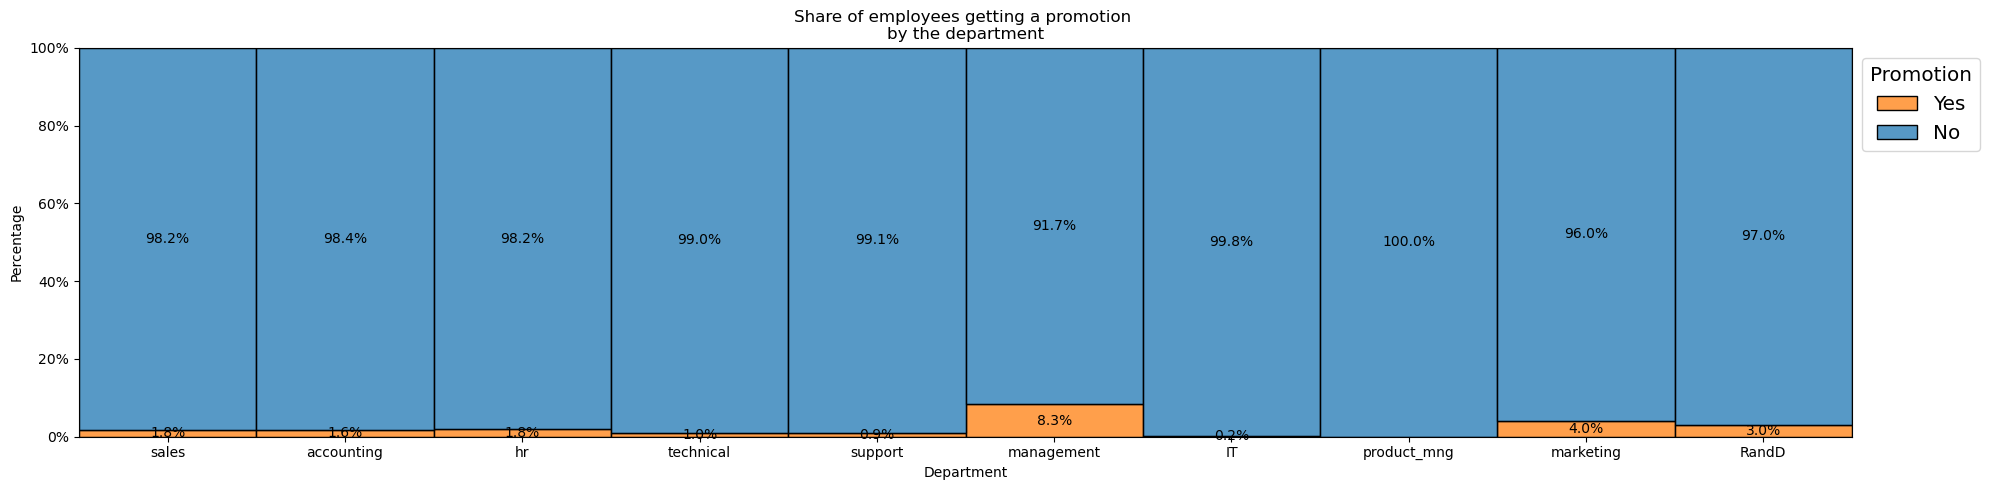

In [61]:
# Create stacked barchart to compare department share of employees who got a promotion and didn't
plt.figure(figsize=(20,5))
ax = sns.histplot(data=df1, x='department', hue='promotion_last_5years', stat='probability', multiple = 'fill', binwidth=0.9)
ax.legend(labels = ['Yes', 'No'], title='Promotion', fontsize='x-large', title_fontsize='x-large', 
          loc='upper left', bbox_to_anchor=(1, 1))
ax.set(xlabel='Department', ylabel='Percentage', title = 'Share of employees getting a promotion \nby the department')

for bars in ax.containers:
    heights = [b.get_height() for b in bars]
    labels = [f'{h * 100:.1f}%' if h > 0.001 else '' for h in heights]
    ax.bar_label(bars, labels=labels, label_type='center')
    
ax.yaxis.set_major_formatter(PercentFormatter(1))
plt.tight_layout()
plt.show()

The management department also has the highest share of employees who have been promoted in the last 5 years. This can both be due to the quality of employees working there and due to the fact that the department also has a large share of employees who stayed working at the company for 10 years thus making it quite likely that those are quite likely to have gotten a promotion. 

### 3.2.7 Analyzing bivariate distributions

In [62]:
# Calculate the number of emplyees who quit among those who had an accident and didn't 
df1.groupby(['work_accident']).agg({'left': 'count'})

left
work_accident       
0              10141
1               1850

As can be seen, the majority of those who left were found among employees who had no work accidents. This can serve as evidence to prove that among the employees who left the company the majority made this decision themselves instead of being fired due to the unsatisfactory quality of their work. 

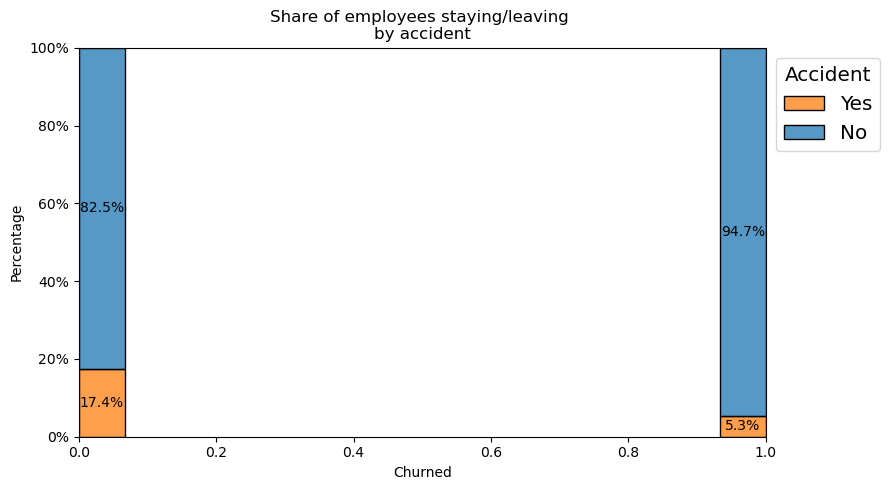

In [63]:
# Create stacked barchart to compare share of employees who left to that of employees who didn't among those with accidents and no accidents reported
plt.figure(figsize=(9,5)), 
ax = sns.histplot(data=df1, x='left', hue='work_accident', stat='probability', multiple = 'fill')
ax.legend(labels = ['Yes', 'No'], title='Accident', fontsize='x-large', title_fontsize='x-large', 
          loc='upper left', bbox_to_anchor=(1, 1))
ax.set(xlabel='Churned', ylabel='Percentage', title = 'Share of employees staying/leaving \nby accident')

for bars in ax.containers:
    heights = [b.get_height() for b in bars]
    labels = [f'{h * 100:.1f}%' if h > 0.001 else '' for h in heights]
    ax.bar_label(bars, labels=labels, label_type='center')
    
ax.yaxis.set_major_formatter(PercentFormatter(1))
plt.tight_layout()

plt.show()

Even with a slight change of perspective to a more relative one, it appears to be true that the share of employees who **did** have an accident is bigged among those who **did not** churn. Overall, whether of not an employee has had any work-related accidents is quite unlikely to become a strong predictor of churn given the contradiction with an intuitive assumption that could have been made. 

# PACE: Construct Stage

## Model assumptions

**Logistic Regression model assumptions to check in advance**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables 
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size 

## Step 4. Model Building

The present stage is composed of: 

* 4.1 Logistic regression model
* 4.2 First round of decision tree and random forest models
* 4.3 Second and third rounds of modeling 
* 4.4 Final model selection and evaluation

The goal of building the model that follows is to predict whether an employee leaves the company or not, which is a categorical outcome variable thus making the task overall a classification one. More specifically, this involves binary classification, since the outcome variable `left` can be either 1 (indicating employee left) or 0 (indicating employee didn't leave). Since the variable that is to be predicted (whether an employee leaves the company) is categorical, either a Logistic Regression model, or a Tree-based Machine Learning model can be built. We begin with constructing  Logistic Regression model first and then move to the Tree-based Machine Learning models in what follows. 

### 4.1 Logistic regression model

### Modeling Approach A: Logistic Regression Model

To prepare the data to be used in model building it is important to deal with two non-numeric variables, namely `department` and `salary` variables first by encoding and making those not only numeric but also, plausibly, binary with the help of dummy encoding. However, when it comes to the `salary` variable, it is important to note that categories that it is composed of have a hierarchy to them. Instead of making a binary variable out of it is advised to simply convert it to a numeric one with values ranging from 0 to 2. 

In [64]:
# Copy the dataframe
df_enc = df1.copy()

# Encode the `salary` column as an ordinal numeric category
df_enc['salary'] = (
    df_enc['salary'].astype('category')
    .cat.set_categories(['low', 'medium', 'high'])
    .cat.codes
)

# Dummy encode the `department` column
df_enc = pd.get_dummies(df_enc, drop_first=False)

# Display the new dataframe
df_enc.head()

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
1                0.80             0.86               5                    262   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   

   tenure  work_accident  left  promotion_last_5years  salary  department_IT  \
0       3              0     1                      0       0              0   
1       6              0     1                      0       1              0   
2       4              0     1                      0       1              0   
3       5              0     1                      0       0              0   
4       3              0     1                      0       0              0   

   department_RandD  department_accounting  department_hr  \
0                 0                      0              0   
1                 0                      0              0   
2                 0                      0              0   
3                 0                      0              0   
4                 0                      0              0   

   department_management  department_marketing  department_product_mng  \
0                      0                     0                       0   
1                      0                     0                       0   
2                      0                     0                       0   
3                      0                     0                       0   
4                      0                     0                       0   

   department_sales  department_support  department_technical  
0                 1                   0                     0  
1                 1                   0                     0  
2                 1                   0                     0  
3                 1                   0                     0  
4                 1                   0                     0

As it was highlighted in the beginning, some outliers were observed for the `tenure` variable. Due to the fact that logistic regression models are quite sensitive to those (check model assumptions), it is better to remove those while preparing data for the analysis. 

In [65]:
# Select rows without outliers in `tenure` and save resulting dataframe in a new one
df_logreg = df_enc[(df_enc['tenure'] >= lower_limit) & (df_enc['tenure'] <= upper_limit)]

# Display first few rows of new (final) dataframe
df_logreg.head()

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   
5                0.41             0.50               2                    153   

   tenure  work_accident  left  promotion_last_5years  salary  department_IT  \
0       3              0     1                      0       0              0   
2       4              0     1                      0       1              0   
3       5              0     1                      0       0              0   
4       3              0     1                      0       0              0   
5       3              0     1                      0       0              0   

   department_RandD  department_accounting  department_hr  \
0                 0                      0              0   
2                 0                      0              0   
3                 0                      0              0   
4                 0                      0              0   
5                 0                      0              0   

   department_management  department_marketing  department_product_mng  \
0                      0                     0                       0   
2                      0                     0                       0   
3                      0                     0                       0   
4                      0                     0                       0   
5                      0                     0                       0   

   department_sales  department_support  department_technical  
0                 1                   0                     0  
2                 1                   0                     0  
3                 1                   0                     0  
4                 1                   0                     0  
5                 1                   0                     0

In [66]:
# Isolate the outcome variable
y = df_logreg['left']

# Display first few rows of the outcome variable
y.head() 

0    1
2    1
3    1
4    1
5    1
Name: left, dtype: int64

In [67]:
# Select the features to be used as predictors
X = df_logreg.drop('left', axis=1)

# Display the first few rows of the selected features 
X.head()

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   
5                0.41             0.50               2                    153   

   tenure  work_accident  promotion_last_5years  salary  department_IT  \
0       3              0                      0       0              0   
2       4              0                      0       1              0   
3       5              0                      0       0              0   
4       3              0                      0       0              0   
5       3              0                      0       0              0   

   department_RandD  department_accounting  department_hr  \
0                 0                      0              0   
2                 0                      0              0   
3                 0                      0              0   
4                 0                      0              0   
5                 0                      0              0   

   department_management  department_marketing  department_product_mng  \
0                      0                     0                       0   
2                      0                     0                       0   
3                      0                     0                       0   
4                      0                     0                       0   
5                      0                     0                       0   

   department_sales  department_support  department_technical  
0                 1                   0                     0  
2                 1                   0                     0  
3                 1                   0                     0  
4                 1                   0                     0  
5                 1                   0                     0

The data is then split into training set and testing sets and is stratified based on the values in `y` due to the classes being unbalanced.

In [68]:
# Split the data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

In [69]:
# Construct a logistic regression model and fit it to the training dataset
log_clf = LogisticRegression(random_state=42, max_iter=500).fit(X_train, y_train)

In [70]:
# Use the logistic regression model to get predictions on the test set
y_pred = log_clf.predict(X_test)

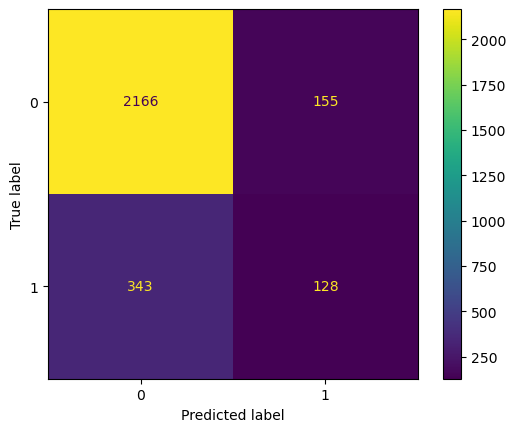

In [71]:
# Compute values for confusion matrix
log_cm = confusion_matrix(y_test, y_pred, labels=log_clf.classes_)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, 
                                  display_labels=log_clf.classes_)

# Plot confusion matrix
log_disp.plot(values_format='')

# Display plot
plt.show()

To refresh the way the present visualization can be read its components can be recalled first: 

* The upper-left quadrant displays the number of true negatives - the number of people who did not leave that the model accurately predicted did not leave.

* The upper-right quadrant displays the number of false positives - the number of people who did not leave the model inaccurately predicted as leaving.

* The bottom-left quadrant displays the number of false negatives - the  number of people who left that the model inaccurately predicted did not leave

* The bottom-right quadrant displays the number of true positives - the number of people who left the model accurately predicted as leaving

A perfect model would yield all true negatives and true positives, and no false negatives or false positives, thus making perfect predictions with no errors at all. Such results, however, are nearly impossible to achieve. As it can be seen, the model that was constructed did make some prediction mistakes given there are some false positives and false negatives present. The particularly concerning part are false negatives - data points, employees, who left despite the fact that the model predicted those are the ones to stay. False positives are a lot less costly to the company compared to losing an employee resulting in additional hiring and training expenses.  Even if an employee that the model predicted to leave stays at the company, the company still benefits by raising their overall employee job satisfaction (if action is taken only in regards to particular employees meeting the criteria) or makes the working environment better overall (if more extensive measures are taken) both possibly preventing employees churining in the future even if right now they were not considering leaving the company. 

As it can be seen, there are 343 cases of false negative predictions and 155 false positive predictions which is not desireable in this particular scenario. 

In [72]:
# Create classification report for logistic regression model
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, y_pred, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.86      0.93      0.90      2321
    Predicted would leave       0.45      0.27      0.34       471

                 accuracy                           0.82      2792
                macro avg       0.66      0.60      0.62      2792
             weighted avg       0.79      0.82      0.80      2792



In order to assess the performance of the model the foloowing report can be generated. The classification report above shows that the logistic regression model achieved a precision of 79%, recall of 82%, f1-score of 80% (all weighted averages), and accuracy of 82%. 

As a reminder, using precision as an evaluation metric is especially helpful in contexts where the cost of a false positive (the model predicts that an employee will leave, but they stay) is much higher than the cost of a false negative (the model predicts that an employee will stay, but they leave). On the contratry, recall can be used as an evaluation metric in contexts where the cost of a false negative is higher than the cost of a false positive (which is the case for the present case). In other words, precision measures the proportion of data points predicted as **True** that are actually **True**, while recall measures the proportion of data points that are predicted as **True**, out of all the data points that are actually **True**. As for the accuracy measure, it shows how much of the data at hand has been correctly categorized by the classifier.

### 4.2 First round of decision tree and random forest models

### Modeling Approach B: Tree-based Model

The construction of a tree-based model begins in a similar way by isolating outcome and predictor variables and dividing the dataset into several subsets to be used for training, testing and validating. We will be using the same dataset as the one used in the construction of logistic regression model A - it already has the two categorical columns encoded. Note, however, that we are using the same variable names thus rewriting the ones we used above. 

In [73]:
# Isolate the outcome variable
y = df_enc['left']

# Display the first few rows of `y`
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [74]:
# Select the features
X = df_enc.drop('left', axis=1)

# Display the first few rows of `X`
X.head()

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
1                0.80             0.86               5                    262   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   

   tenure  work_accident  promotion_last_5years  salary  department_IT  \
0       3              0                      0       0              0   
1       6              0                      0       1              0   
2       4              0                      0       1              0   
3       5              0                      0       0              0   
4       3              0                      0       0              0   

   department_RandD  department_accounting  department_hr  \
0                 0                      0              0   
1                 0                      0              0   
2                 0                      0              0   
3                 0                      0              0   
4                 0                      0              0   

   department_management  department_marketing  department_product_mng  \
0                      0                     0                       0   
1                      0                     0                       0   
2                      0                     0                       0   
3                      0                     0                       0   
4                      0                     0                       0   

   department_sales  department_support  department_technical  
0                 1                   0                     0  
1                 1                   0                     0  
2                 1                   0                     0  
3                 1                   0                     0  
4                 1                   0                     0

In [75]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

#### Decision tree - Round 1

An important difference as a part of the decision tree model construction will be the fact that we will also conduct cross-validated grid-search to exhuastively search for the best model parameters. We will not be using a separate validation set. The parameters we will be testing multiple values for include max_depth, min_samples_leaf and min_samples_split. The valuees can be later adjusted. 

- max_depth defines how deep the tree is allowed to grow
- min_samples_leaf defines the minimum number of samples that must be in each child node after the parent splits
- min_samples_split defines the minimum number of samples that a node must have for it to split into more nodes

Note on the arguments used: 

- The classifier (tree)
- The dictionary of hyperparameters to search over (cv_params)
- The set of scoring metrics (scoring)
- The number of cross-validation folds (cv=4)
- The scoring metric that you want GridSearch to use when it selects the "best" model (i.e., the model that performs best on average over all validation folds) (refit='roc_auc') Alternatively one could also use recall in this particular case.

In [76]:
# Instantiate model
tree = DecisionTreeClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
tree1 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [77]:
%%time
tree1.fit(X_train, y_train)

CPU times: user 4.45 s, sys: 185 ms, total: 4.64 s
Wall time: 5.03 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring={'f1', 'precision', 'accuracy', 'recall', 'roc_auc'})

In [78]:
# Check best parameters
tree1.best_params_

{'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 2}

As it can be seen, the optimal parameters have been identified for the present model. The best AUC score achieved by the decision tree model on the training set can also be calculated to give us an idea of how well it is perfroming.

In [79]:
# Check best AUC score on CV
tree1.best_score_

0.969819392792457

As a reminder, AUC is a measure of the two-dimensional area underneath an ROC (receiver operating characteristic) curve and provides an aggregate measure of performance across all possible classification thresholds. One of the ways to interpret AUC is to consider it as the probability that the model ranks a random positive sample more highly than a random negative sample. AUC ranges in value from 0.0 to 1.0. Observed AUC score is high and close to 1.0, thus proving that the model can predict employees who will leave very well.

In [80]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, accuracy, or auc
  
    Returns a pandas df with the F1, recall, precision, accuracy, and auc scores
    for the model with the best mean 'metric' score across all validation folds.  
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'auc': 'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
  
    # Create table of results
    table = pd.DataFrame()
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]
                        })
  
    return table

In [81]:
# Get all CV scores
tree1_cv_results = make_results('decision tree cv', tree1, 'auc')
tree1_cv_results

model  precision    recall        F1  accuracy       auc
0  decision tree cv   0.914552  0.916949  0.915707  0.971978  0.969819

Now with a newly built function it is possible to extract all the necessary performance measures of the model. As it can be seen, the model performs really well. Now that this model is constructed and its performance can be reported using the metric above we can move to contructing a random forest model. The reason for that is simply the fact that decision trees can be vulnerable to overfitting, and random forests avoid overfitting by incorporating multiple trees to make predictions. 

#### Random forest - Round 1

The cross-validationprocess is the same as it for simple decision tree models with the only difference being that we are tuning more hyperparameters. We now additionally have: 

- max_features which specifies the number of features that each tree randomly selects during training 
- max_samples which specifies the number of samples bootstrapped from the dataset to train each base model
- n_estimators which specifies the number of trees the model will build in its ensemble

The only change in the function arguments is simply the classifier name, the rest is kept the same. Additionally, we already have the tesr and train sets defined. 

In [82]:
# Instantiate model
rf = RandomForestClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }  

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
rf1 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [83]:
%%time
rf1.fit(X_train, y_train) # --> Wall time: ~24min

CPU times: user 24min 3s, sys: 28.4 s, total: 24min 32s
Wall time: 27min 24s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [3, 5, None], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [300, 500]},
             refit='roc_auc',
             scoring={'f1', 'precision', 'accuracy', 'recall', 'roc_auc'})

Construction of a random forest model takes a lot more time (over 20 minutes as reported). It is advised to save the model and specify the path to where it will be saved for further use so that it is not necessary to run the time consuming model fitting code every single time.

In [84]:
# Define a path to the folder where you want to save the model
path = '/Users/evgeniaulanova/Desktop/Jupiter/'

In [85]:
def write_pickle(path, model_object, save_as:str):
    '''
    In: 
        path:         path of folder where you want to save the pickle
        model_object: a model you want to pickle
        save_as:      filename for how you want to save the model

    Out: A call to pickle the model in the folder indicated
    '''    

    with open(path + save_as + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)

In [86]:
def read_pickle(path, saved_model_name:str):
    '''
    In: 
        path:             path to folder where you want to read from
        saved_model_name: filename of pickled model you want to read in

    Out: 
        model: the pickled model 
    '''
    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)

    return model

In [87]:
# Write pickle
write_pickle(path, rf1, 'hr_rf1')

In [88]:
# Read pickle
rf1 = read_pickle(path, 'hr_rf1')

Now the model can be retieved right back without it taking another 20 minutes to be built from scratch. We can immediately go into a deeper dive in terms of its quality and characteristics. 

In [89]:
# Check best AUC score on CV
rf1.best_score_

0.9804250949807172

In [90]:
# Check best parameters
rf1.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 500}

In [91]:
# Get all CV scores
rf1_cv_results = make_results('random forest cv', rf1, 'auc')
print(tree1_cv_results)
print(rf1_cv_results)

              model  precision    recall        F1  accuracy       auc
0  decision tree cv   0.914552  0.916949  0.915707  0.971978  0.969819
              model  precision    recall        F1  accuracy       auc
0  random forest cv   0.950023  0.915614  0.932467  0.977983  0.980425


At first we check the AUC score of the new model and retrieve insights in regards to its design (optimal parameter values). However, while AUC and other quality/accuracy metrics are good on their own it's always better to compare performance across different models to pick truly the best one. Note that the make_results() function was created above and is now simply called for. 

As it can be seen, the evaluation scores of the random forest model are better than those of the decision tree model, with the exception of recall - the recall score of the random forest model is approximately 0.001 lower, which is a negligible amount. Despite the fact that recall is more valuable in this particular case study, overall, the random forest model mostly outperforms the decision tree model.

We proceeed to evaluate the final model on the test set - entirely new data to evaluate our final model.

In [92]:
def get_scores(model_name:str, model, X_test_data, y_test_data):
    '''
    Generate a table of test scores.

    In: 
        model_name (string):  How you want your model to be named in the output table
        model:                A fit GridSearchCV object
        X_test_data:          numpy array of X_test data
        y_test_data:          numpy array of y_test data

    Out: pandas df of precision, recall, f1, accuracy, and AUC scores for your model
    '''

    preds = model.best_estimator_.predict(X_test_data)

    auc = roc_auc_score(y_test_data, preds)
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision], 
                          'recall': [recall],
                          'f1': [f1],
                          'accuracy': [accuracy],
                          'AUC': [auc]
                         })
  
    return table

In [93]:
# Get predictions on test data
rf1_test_scores = get_scores('random forest1 test', rf1, X_test, y_test)
rf1_test_scores

model  precision    recall        f1  accuracy       AUC
0  random forest1 test   0.964211  0.919679  0.941418  0.980987  0.956439

As it can be seen, the test scores are rather similar to the validation scores, which is good. Our final model appears to be a strong and well performing one. Once again, since we made sure to initiate validation, the final test set that is used to evaluate our model was only used in this particular instance. We can be more confident that the final model's performance on this data is representative of how it will perform on new, unseeen data in the future. 

Technically, the project could end here and the model could be experted and reported. However, there is an opportunity to go one step further. 

### 4.3 Second and third rounds of modeling

#### Feature Engineering

Some slight adjustments can be made now that we are familiar with the dataset and know exactly how the model is performing. In particular, the model showcases a very good performance when it comes to predicting whether of not an employee will leave the company. Although as it is such a result is desireable, one can become quite sceptical of whether such high evaluation scores can actually be trusted. A data leakage is what we could be dealing with. In other words, we might be using some data for training our model that we shouldn't be using: it might be due to the fact that such data later appears in the test data or due to the fact that this data would not be avaliable for the model once it is actually put to work. The resulting evaluation scores mught just be too good to be true. 

Numerous ways to tackle this problem can be considered. For instance, will the company truly have the satisfaction score data reported by all of their employees? Or, alternatively, as dicussed above some issues in regards to employee performance (average working hours, number of projects taken etc.) might be simply due to the fact that employee has already been informed of getting fired (or decided to leave on their own) and doesn't feel like putting in as much effort anymore. After submitting the initial report and model evaluation results to the team one has to consult other team members in regards to which variables could be either re-coded or dropped. For instance, one could proceed by dropping `satisfaction_level` and creating a new feature that roughly captures whether an employee is overworked. Our primarily exploratory analysis showcased perfectly just how important this factor is in predicting whether of not an employee will leave. This new feature can be called `overworked` and be a binary variable.

In [94]:
# Drop `satisfaction_level` and save resulting dataframe in new one
df2 = df_enc.drop('satisfaction_level', axis=1)

# Display first few rows of new dataframe
df2.head()

last_evaluation  number_project  average_monthly_hours  tenure  \
0             0.53               2                    157       3   
1             0.86               5                    262       6   
2             0.88               7                    272       4   
3             0.87               5                    223       5   
4             0.52               2                    159       3   

   work_accident  left  promotion_last_5years  salary  department_IT  \
0              0     1                      0       0              0   
1              0     1                      0       1              0   
2              0     1                      0       1              0   
3              0     1                      0       0              0   
4              0     1                      0       0              0   

   department_RandD  department_accounting  department_hr  \
0                 0                      0              0   
1                 0                      0              0   
2                 0                      0              0   
3                 0                      0              0   
4                 0                      0              0   

   department_management  department_marketing  department_product_mng  \
0                      0                     0                       0   
1                      0                     0                       0   
2                      0                     0                       0   
3                      0                     0                       0   
4                      0                     0                       0   

   department_sales  department_support  department_technical  
0                 1                   0                     0  
1                 1                   0                     0  
2                 1                   0                     0  
3                 1                   0                     0  
4                 1                   0                     0

In [95]:
# Create `overworked` column. For now, it's identical to average monthly hours.
df2['overworked'] = df2['average_monthly_hours']

# Inspect max and min average monthly hours values
print('Max hours:', df2['overworked'].max())
print('Min hours:', df2['overworked'].min())

Max hours: 310
Min hours: 96


As was mentioned prior, 166.67 is approximately the average number of monthly hours for someone who works 50 weeks per year, 5 days per week, 8 hours per day, which was also plotted as a divider line on multiple graphs. It could be seen that the majority people in the company were working way longer hours. It is unclear as to where the line should be drawn when it comes to considering one to be overworking. As of now, it can be set as working 175 hours month on average or more.

The stages for boolean masking and making the new variable binary include: 
- `df3['overworked'] > 175` creates a series of booleans, consisting of `True` for every value > 175 and `False` for every values ≤ 175
- `.astype(int)` converts all `True` to `1` and all `False` to `0` 

In [96]:
# Define `overworked` as working > 175 hrs/week
df2['overworked'] = (df2['overworked'] > 175).astype(int)

# Display first few rows of new column
df2['overworked'].head()

0    0
1    1
2    1
3    1
4    0
Name: overworked, dtype: int64

We now drop the `average_monthly_hours` column and proceeed to divide the new dataset into sets just like we did before. 

In [97]:
# Drop the `average_monthly_hours` column
df2 = df2.drop('average_monthly_hours', axis=1)

# Display first few rows of resulting dataframe
df2.head()

last_evaluation  number_project  tenure  work_accident  left  \
0             0.53               2       3              0     1   
1             0.86               5       6              0     1   
2             0.88               7       4              0     1   
3             0.87               5       5              0     1   
4             0.52               2       3              0     1   

   promotion_last_5years  salary  department_IT  department_RandD  \
0                      0       0              0                 0   
1                      0       1              0                 0   
2                      0       1              0                 0   
3                      0       0              0                 0   
4                      0       0              0                 0   

   department_accounting  department_hr  department_management  \
0                      0              0                      0   
1                      0              0                      0   
2                      0              0                      0   
3                      0              0                      0   
4                      0              0                      0   

   department_marketing  department_product_mng  department_sales  \
0                     0                       0                 1   
1                     0                       0                 1   
2                     0                       0                 1   
3                     0                       0                 1   
4                     0                       0                 1   

   department_support  department_technical  overworked  
0                   0                     0           0  
1                   0                     0           1  
2                   0                     0           1  
3                   0                     0           1  
4                   0                     0           0

In [98]:
# Isolate the outcome variable
y2 = df2['left']

# Select the features
X2 = df2.drop('left', axis=1)

In [99]:
# Create test data
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.25, stratify=y2, random_state=0)

Now that everything is ready, we proceed to conduct the second round of model building both for our decision tree modela nd random forest model using the new dataset. 

#### Decision tree - Round 2

In [100]:
# Instantiate model
tree = DecisionTreeClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
tree2 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [101]:
%%time
tree2.fit(X_train2, y_train2)

CPU times: user 3.89 s, sys: 138 ms, total: 4.03 s
Wall time: 4.43 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring={'f1', 'precision', 'accuracy', 'recall', 'roc_auc'})

In [102]:
# Check best params
tree2.best_params_

{'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 6}

In [103]:
# Check best AUC score on CV
tree2.best_score_

0.9586752505340426

In [104]:
# Get all CV scores
tree2_cv_results = make_results('decision tree2 cv', tree2, 'auc')
print(tree1_cv_results)
print(tree2_cv_results)

              model  precision    recall        F1  accuracy       auc
0  decision tree cv   0.914552  0.916949  0.915707  0.971978  0.969819
               model  precision    recall        F1  accuracy       auc
0  decision tree2 cv   0.856693  0.903553  0.878882  0.958523  0.958675


The model still performs well on the AUC metric and overall is very satisfactory despite the fact that, as expected, some of the other scores fell. 

#### Decision tree - Round 3

One might question the choice of the divider value when it comes to the newly created variable. Quite reasonably, it could be clearly seen from the graphs created above that all of the employees whose working hours exceeded 280 or 285 hours per month have left the company - a clear dividing line has been clearly observed. It might seem like it would make sense to consider people who work for more than 280 hours a month overwroked instead of using a lower 175 hours value. In the code chunk below we can quickly test this out and see if the model would perform better if the new variable was created in such a way. It is important to remember that this chunk of code is inserted here to make the flow of the analysis more intuitive and easy to follow but it is only possible due to the fact that the random forest models are already pickled and and can be called without running any code. A change in a dataset changes the test and training sets in turn and if the following rf2 model wasn't pickled beforehand it would end up being the same as the rf3 model. To take additional preventive measures we add index '3' to the text and train sets, and the sets above are aslso assigned indexes. Similarly, the new dataset is also indexed accordingly. 

In [105]:
# Drop `satisfaction_level` and save resulting dataframe in a new one
df3 = df_enc.drop('satisfaction_level', axis=1)

# Display first few rows of new dataframe
df3.head()

last_evaluation  number_project  average_monthly_hours  tenure  \
0             0.53               2                    157       3   
1             0.86               5                    262       6   
2             0.88               7                    272       4   
3             0.87               5                    223       5   
4             0.52               2                    159       3   

   work_accident  left  promotion_last_5years  salary  department_IT  \
0              0     1                      0       0              0   
1              0     1                      0       1              0   
2              0     1                      0       1              0   
3              0     1                      0       0              0   
4              0     1                      0       0              0   

   department_RandD  department_accounting  department_hr  \
0                 0                      0              0   
1                 0                      0              0   
2                 0                      0              0   
3                 0                      0              0   
4                 0                      0              0   

   department_management  department_marketing  department_product_mng  \
0                      0                     0                       0   
1                      0                     0                       0   
2                      0                     0                       0   
3                      0                     0                       0   
4                      0                     0                       0   

   department_sales  department_support  department_technical  
0                 1                   0                     0  
1                 1                   0                     0  
2                 1                   0                     0  
3                 1                   0                     0  
4                 1                   0                     0

In [106]:
# Create `overworked` column. For now, it's identical to average monthly hours.
df3['overworked'] = df3['average_monthly_hours']

In [107]:
# Define `overworked` as working > 280 hrs/week
df3['overworked'] = (df3['overworked'] > 280).astype(int)

# Display first few rows of new column
df3['overworked'].head()

0    0
1    0
2    0
3    0
4    0
Name: overworked, dtype: int64

In [108]:
# Drop the `average_monthly_hours` column
df3 = df3.drop('average_monthly_hours', axis=1)

# Display first few rows of resulting dataframe
df3.head()

last_evaluation  number_project  tenure  work_accident  left  \
0             0.53               2       3              0     1   
1             0.86               5       6              0     1   
2             0.88               7       4              0     1   
3             0.87               5       5              0     1   
4             0.52               2       3              0     1   

   promotion_last_5years  salary  department_IT  department_RandD  \
0                      0       0              0                 0   
1                      0       1              0                 0   
2                      0       1              0                 0   
3                      0       0              0                 0   
4                      0       0              0                 0   

   department_accounting  department_hr  department_management  \
0                      0              0                      0   
1                      0              0                      0   
2                      0              0                      0   
3                      0              0                      0   
4                      0              0                      0   

   department_marketing  department_product_mng  department_sales  \
0                     0                       0                 1   
1                     0                       0                 1   
2                     0                       0                 1   
3                     0                       0                 1   
4                     0                       0                 1   

   department_support  department_technical  overworked  
0                   0                     0           0  
1                   0                     0           0  
2                   0                     0           0  
3                   0                     0           0  
4                   0                     0           0

In [109]:
# Isolate the outcome variable
y3 = df3['left']

# Select the features
X3 = df3.drop('left', axis=1)

In [110]:
# Create test data
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.25, stratify=y3, random_state=0)

In [111]:
# Instantiate model
tree = DecisionTreeClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
tree3 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [112]:
%%time
tree3.fit(X_train3, y_train3)

CPU times: user 4.12 s, sys: 192 ms, total: 4.31 s
Wall time: 4.68 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring={'f1', 'precision', 'accuracy', 'recall', 'roc_auc'})

In [113]:
# Check best params
tree3.best_params_

{'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 6}

In [114]:
# Check best AUC score on CV
tree3.best_score_

0.9585813168747879

In [115]:
# Get all CV scores
tree3_cv_results = make_results('decision tree3 cv', tree3, 'auc')
print(tree1_cv_results)
print(tree2_cv_results)
print(tree3_cv_results)

              model  precision    recall        F1  accuracy       auc
0  decision tree cv   0.914552  0.916949  0.915707  0.971978  0.969819
               model  precision    recall        F1  accuracy       auc
0  decision tree2 cv   0.856693  0.903553  0.878882  0.958523  0.958675
               model  precision    recall        F1  accuracy       auc
0  decision tree3 cv   0.829885  0.901541  0.863543  0.952518  0.958581


The new model underperforms compared to its counterparts. Precision and F1 scores are the ones that register the largest drop in values. At this point it is important to discuss the matter with the team and decide which of the variable versions is more sensible and which of the quality metrics should be valued more. A more detailed explanation behind the reasons why using 175 threshold instead of the 280 one can be found in what follows. 

#### Random forest - Round 2

Similarly, we proceed to build the second and the third random forest models following the same logic. 

In [116]:
# Instantiate model
rf = RandomForestClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }  

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
rf2 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [117]:
%%time
rf2.fit(X_train2, y_train2) # --> Wall time: ~20min

CPU times: user 19min 12s, sys: 28.2 s, total: 19min 40s
Wall time: 22min 27s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [3, 5, None], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [300, 500]},
             refit='roc_auc',
             scoring={'f1', 'precision', 'accuracy', 'recall', 'roc_auc'})

In [118]:
# Write pickle
write_pickle(path, rf2, 'hr_rf2')

In [119]:
# Read in pickle
rf2 = read_pickle(path, 'hr_rf2')

In [120]:
# Check best params
rf2.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 300}

In [121]:
# Check best AUC score on CV
rf2.best_score_

0.9648100662833985

In [122]:
# Get all CV scores
rf2_cv_results = make_results('random forest2 cv', rf2, 'auc')
print(tree2_cv_results)
print(rf2_cv_results)

               model  precision    recall        F1  accuracy       auc
0  decision tree2 cv   0.856693  0.903553  0.878882  0.958523  0.958675
               model  precision    recall        F1  accuracy      auc
0  random forest2 cv   0.866758  0.878754  0.872407  0.957411  0.96481


Similarly, it was expected that the scores would drop slightly now that we altered the data that we are using to train our model. The random forest model still performs better when compared to its decision tree alternative. 

#### Random forest - Round 3

In [123]:
# Instantiate model
rf = RandomForestClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }  

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
rf3 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [124]:
%%time
rf3.fit(X_train3, y_train3) # --> Wall time: ~19 min #Fitting to indexed sets

CPU times: user 18min 14s, sys: 26.6 s, total: 18min 40s
Wall time: 21min 14s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [3, 5, None], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [300, 500]},
             refit='roc_auc',
             scoring={'f1', 'precision', 'accuracy', 'recall', 'roc_auc'})

In [125]:
# Write pickle
write_pickle(path, rf3, 'hr_rf3')

In [126]:
# Read in pickle
rf3 = read_pickle(path, 'hr_rf3')

In [127]:
# Check best params
rf3.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 1.0,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 300}

In [128]:
# Check best AUC score on CV
rf3.best_score_

0.9668260961611064

In [129]:
# Get all CV scores
rf3_cv_results = make_results('random forest3 cv', rf3, 'auc')
print(rf2_cv_results)
print(rf3_cv_results)

               model  precision    recall        F1  accuracy      auc
0  random forest2 cv   0.866758  0.878754  0.872407  0.957411  0.96481
               model  precision    recall        F1  accuracy       auc
0  random forest3 cv   0.843696  0.876745  0.859837  0.952518  0.966826


As it can be seen, the model based on the new dataset (with a 280 hrs/mnth threshold) performs slightly worse than the original one. In particularly, precision and F1 record the largest drop. At this point, it is adviced to discuss with the team which of the models should be kept in the end. As for this particular project we will proceed with rf2 model as our final one - only classifying employees working over 280 hours a month as overworked seems to be extreme and not representative of the reality. While it is true that almost every employee working over 280 hours per month has left the company, the dividing value needs to be left more reasonable. Those extremely overworked employees are not the only ones the HR department needs to focus on retaining - every employee working longer hours (in our case, anyone working for more than 175 hours a month) has to be seen as the one in need of HR's special attention and as a potentially risky one especially since stress from overworking tends to accumulate over time and thus leading one to resign in the end even if their working hours were only slightly higher than average but stagnated at such value for a prolongued perioud of time. 

Now that the final model is chosen, we move to testing it on the testing data set that it has never 'seen'. Note: make sure the test datasets that are used here are the ones created for the second set of models and not the third ones. 

### 4.4 Final model selection and evaluation

#### Final model 

In [130]:
# Get predictions on test data
rf2_test_scores = get_scores('random forest2 test', rf2, X_test2, y_test2)
rf2_test_scores

model  precision    recall      f1  accuracy       AUC
0  random forest2 test   0.870406  0.903614  0.8867  0.961641  0.938407

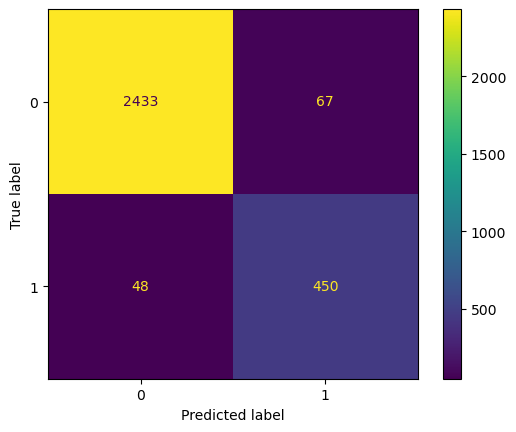

In [131]:
# Generate array of values for confusion matrix
preds = rf2.best_estimator_.predict(X_test2)
cm = confusion_matrix(y_test2, preds, labels=rf2.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf2.classes_)
disp.plot(values_format='');

Now that we have decided on the final model we assess it on the test data by calling for both quality metrics and a confusion matrix to help us understand what kind of errors the model is making when predicting whether an employee would leave or not. As it can be seen from the graph above the model predicts more false positives than false negatives, which means that some employees may be identified as at risk of quitting or getting fired, when that's actually not the case. As explained in the interpretation of the first confusion matrix, for the current case it is beneficial since the cost of false negatives is higher. 

Now that we have the final model that will be reported, we might want to take a closer look at the features inside of it. Identifying which ones were the most important in predicting employee churn can help the HR department to decide on which changes can be introduced to prevent employees from leaving the company. The procedure can be carried out for both the decision tree and the random forest model. 

#### Decision tree splits

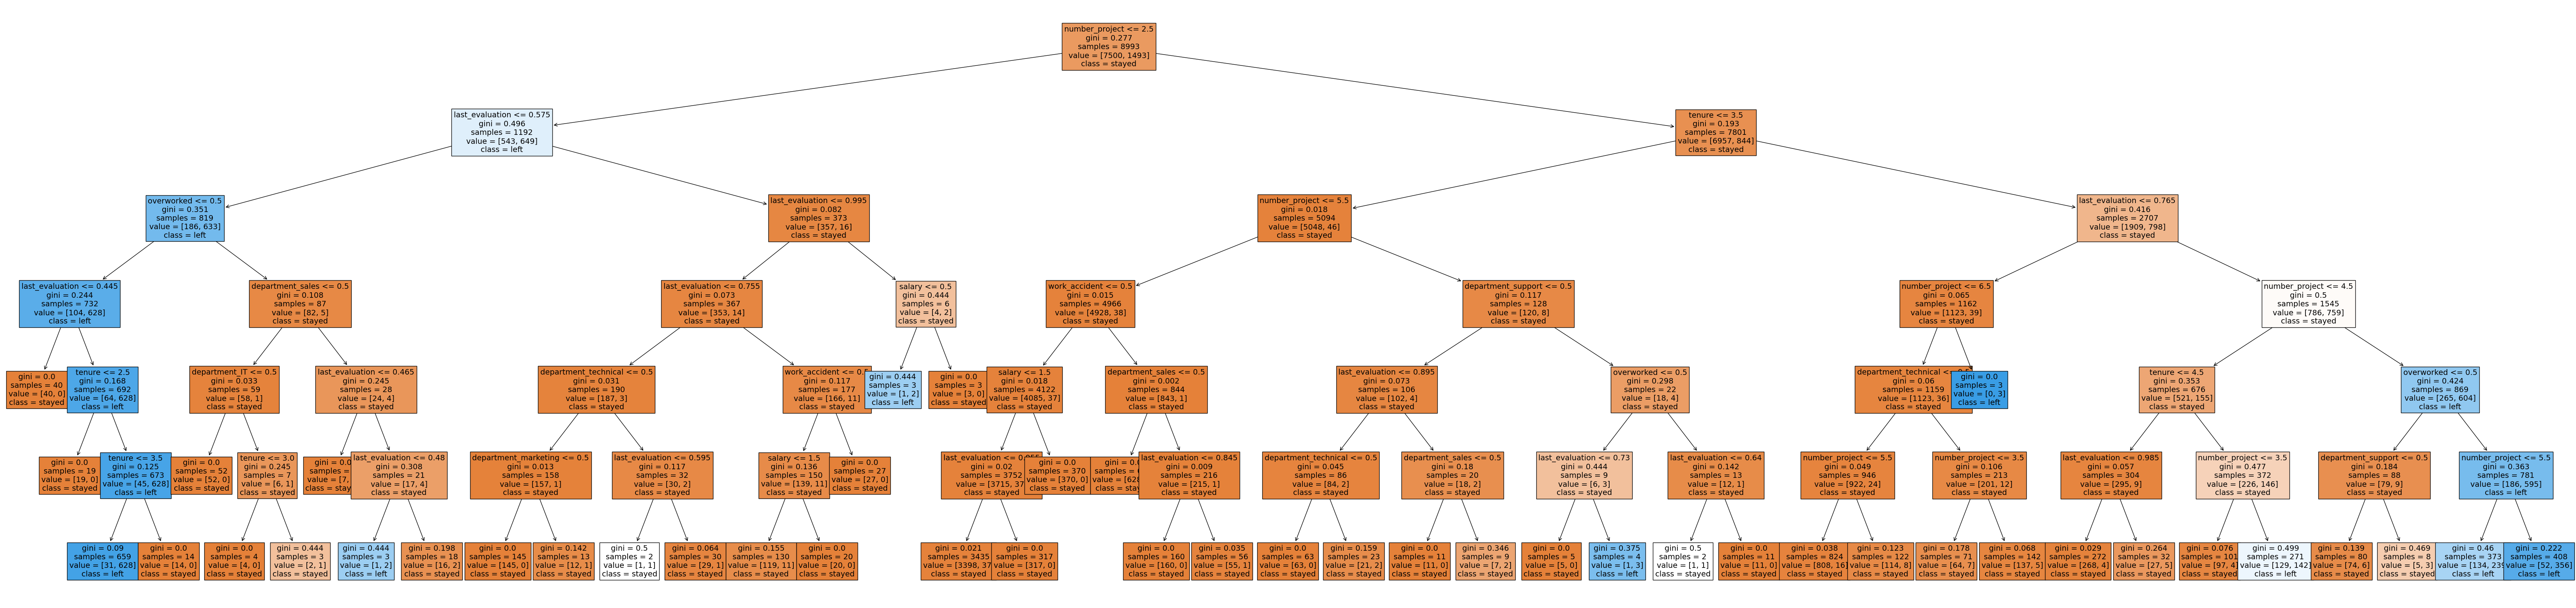

In [132]:
# Plot the tree
plt.figure(figsize=(85,20))
plot_tree(tree2.best_estimator_, max_depth=6, fontsize=14, feature_names=X2.columns, 
          class_names={0:'stayed', 1:'left'}, filled=True);
plt.show()

#### Decision tree feature importance

In [134]:
tree2_importances = pd.DataFrame(tree2.best_estimator_.feature_importances_, 
                                 columns=['gini_importance'], 
                                 index=X2.columns
                                )
tree2_importances = tree2_importances.sort_values(by='gini_importance', ascending=False)

# Only extract the features with importances > 0
tree2_importances = tree2_importances[tree2_importances['gini_importance'] != 0]
tree2_importances

gini_importance
last_evaluation              0.343958
number_project               0.343385
tenure                       0.215681
overworked                   0.093498
department_support           0.001142
salary                       0.000910
department_sales             0.000607
department_technical         0.000418
work_accident                0.000183
department_IT                0.000139
department_marketing         0.000078

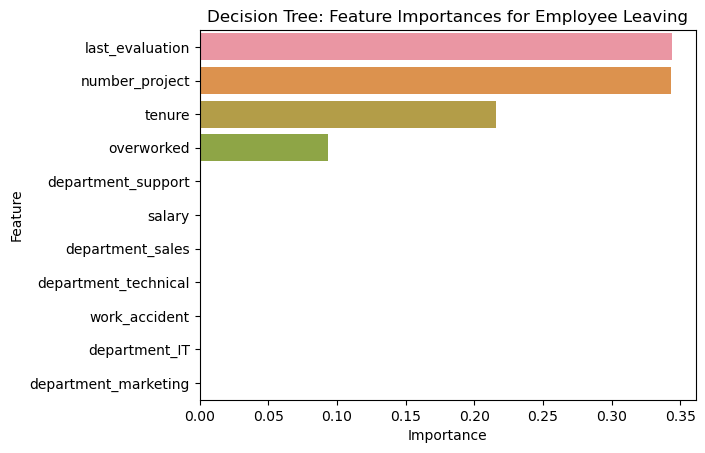

In [135]:
sns.barplot(data=tree2_importances, x="gini_importance", y=tree2_importances.index, orient='h')
plt.title("Decision Tree: Feature Importances for Employee Leaving", fontsize=12)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()

There are differenct ways of getting the idea of which variables were the most important when it came to the model making its predictions. As can be seen from all of the retrieved information above `last_evaluation`, `number_project`, `tenure`, and `overworked` had the highest importance, in that order. These variables are most helpful in predicting the outcome variable, `left`. The decision tree started to grow out using `number_project` as the very first variables and then moved on to `tenure` and `last_evaluation`. It is important to keep in mind that evaluation as a predictive variable has certain issues associated with it given that employees who have already been notified of them being fired or already decided to leave on their own can purposely work not as hard as they would if that wasn't the case.  

#### Random forest feature importance

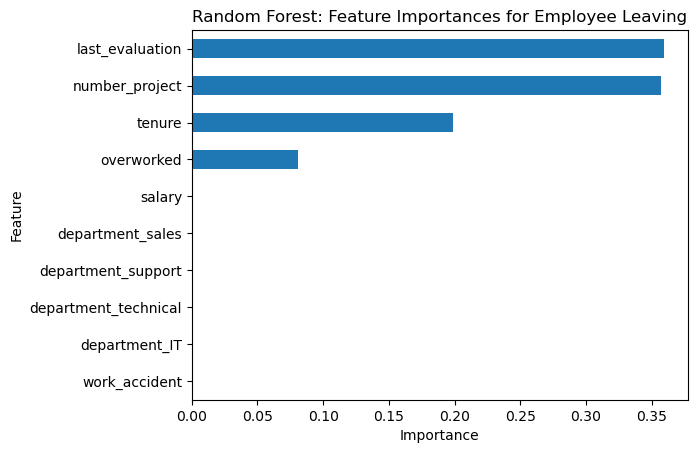

In [136]:
# Get feature importances
feat_impt = rf2.best_estimator_.feature_importances_

# Get indices of top 10 features
ind = np.argpartition(rf2.best_estimator_.feature_importances_, -10)[-10:]

# Get column labels of top 10 features 
feat = X2.columns[ind]

# Filter `feat_impt` to consist of top 10 feature importances
feat_impt = feat_impt[ind]

y_df = pd.DataFrame({"Feature":feat,"Importance":feat_impt})
y_sort_df = y_df.sort_values("Importance")
fig = plt.figure()
ax1 = fig.add_subplot(111)

y_sort_df.plot(kind='barh',ax=ax1,x="Feature",y="Importance")

ax1.set_title("Random Forest: Feature Importances for Employee Leaving", fontsize=12)
ax1.set_ylabel("Feature")
ax1.set_xlabel("Importance")
ax1.get_legend().remove()

plt.show()

When it comes to the random forest model, it can be seen that `last_evaluation`, `number_project`, `tenure`, and `overworked` have the highest importance, in that order. These variables are most helpful in predicting the outcome variable, `left`, and they are not only the same as the ones that ended up having the highest importance for the decision tree model but are also ranked in the same exact order. These are the ones that HR department defenitely needs to look into first and foremost. 

# PACE: Execute Stage

## Step 5. Results and Evaluation

### Summary of model results

**Logistic Regression**

The logistic regression model achieved precision of 79%, recall of 82%, f1-score of 80% (all weighted averages), and accuracy of 82%, on the test set. The model did make some prediction mistakes recording 155 false positives and 343 false negatives. It has been concluded, given the present case scenario, that false negatives are a lot more constly from the company standpoint and should be minimized. 

**Tree-based Machine Learning**

Initial decision tree and random forest models performed exceptionally well with the latter recording slightly higher evaluation metric values. Overall, the new models both performed way bettter than the logistic regression one. 
                      
- Precision: decision tree 0.914552  - random forest 0.950023
- Recall: decision tree 0.916949	- random forest 0.915614
- F1: decision tree 0.915707	- random forest 0.932467
- Accuracy: decision tree 0.971978 - random forest 0.977983
- AUC: decision tree 0.969819 - random forest 0.980425

Finally, since the random forest model was chosen as the best one, it was tested out on the test dataset and achieved precision of 96%, recall of 92%, f1-score of 94% (all weighted averages), and accuracy of 98%. 

Feature engineering was conducted as a measure against the potential data leakage that resulted in such high model performance.In particular, satisfaction variable was not used as a predictor variable and a new variables indicating whther or not an employee is overworking was constructed using both a 175 and 280 hrs/month as its tresholds. After the necessary adjustents were made, the random forest models still performed better than decision tree models in both cases, but models seemed to perfrom slightly better when the tresholod of 175 was used. After conducting feature engineering, the final model achieved AUC of 93.8%, precision of 87.0%, recall of 90.4%, f1-score of 88.7%, and accuracy of 96.2%, on the test set.

The model recorded 67 false positives and 48 false negatives - a significant improvement from the logistic regression model. As for the feature importance, `last_evaluation`, `number_project`, `tenure`, and `overworked` variables had the highest importance for both the decision tree and the random forest models in that order.  

### Recommendations

Now that the final model is constructed and evaluated it is imporant to take a step back and think about the variables that recorded as having the highest importance as model features - those would the variables HR has to take into account while developing new policies to prevent employee churning. Two of the four total variables with the highest importance had to do with workload - `number_project` and `overworked` where the latter is built using the number of working hours an employee reports per month. When it comes to one of the trees that has been visualized, the number of projects an employee is working on became the very firts feature the model selected to branch - working on less than 2.5 projects or not became the treshold. It has been made clear with the visualizations on the EDA stage that high workload had a clear connection with one's willingness to stay working for the company and this hypothesis has now been proven. The following recommendations can be made: 

* Both the number of projects an employee is currently working on and their avergae working hours have to be monitored and thus HR needs to make sure there is a system that makes it easy for employees to report such metrics or it is done automatically: for instance, working time can be tracked using the time when an employee tags their ID card in the morning and once they are done with their work. It is not necessary for HR department to manually monitor such metrics every day but the system needs to be set up in such a way that HR employees get notified if a certain employee or a team is either consistantly working longer hours or crossing the predefined treshold line. Employees need to be well informed when it comes to how such a system operates and in regards to reasons behind its implementation to begin with. To increase employee satisfaction, the HR department workers responsible for employee education on the way the system works need to highlight how important it is for the HR department and the company to make sure its employees are not overworking and make it clear how much the company cares about their employee wellbeing and satisfaction. It is also plausible to mention that such a system was set as a measure against some of the problems that the company used to have to showcase that HR is ready to listen and take an active stance to make the working life of employees better. The system needs to be set up in such way to be user-friendly on both ends so that no additional conflicts or complaints take place only making it worse. 
* Since for some urgent projects it is impossible to simply decrease the number of emplpyees working on it or tell them to cut their working hours, Hr might consider either a) putting more employees on this project among those with lower current work load b) introducing higher rewards for the employees already working on it to highlight that HR understands that the current state of it is NOT normal and the company truly appreciates how hard these employees are working on such projects.   
* Following the above recommendation, if such employees aren't familiar with the company's overtime pay or reward policies, they need to be informed them about this. There needs to be a clear 'manual' as to how the overtime pay and rewards work so that the employees would know what to expect out of it. 
* Additionally, it is possible to reward overworked emplyees in non-monetary ways, For instance, offering them to work from home for the duration of the project so that they could work in a more comfortable environment and still spend time with their family despite working long hours. Additionally, employees can be promissed additional rewards upon the completion of the project such as days off, less demanding workload for the next quarter, promotion etc. 
* It appears to be the case that highly valuable and skillfull employees often end up being overworked precisely because the company wants them to work on all the important projects. On the other hand, employees who don't have as high evaluation scores don't get a chance to prove their value to the company. HR needs to make sure the distribution of the company's work force is not random thur leading to such problems arising. Employee evaluation scores, performance metricts, working hours etc. can all be put in a unified HR system to make it easier to monitor and assign employees to projects accordingly. 
* The way employee evaluations are carried out needs to be investigated to make sure it is truly employee skills and hard work that are being evaluated. Such an important metric needs to be independant from political and social variable interference. 
* Some particular employee cases identified above need to be taken care of - for instance, employees working on 2 projects or employees who have been working for the company for the last 5 years. It is important to identify such 'outliers' and address them given the fact that HR would know the best what exactly is going on in such employee groups. To make it easier for the HR department frequent and regular employee surveys need to be conducted (preferrably anonimously) so that the HR department always stays up-to-date with how employees are feeling. 
* Overall, it is important to also hold company-wide and within-team discussions to understand and address the current problems in regards to the company work culture, across the board and in specific contexts. The discussions can be backed up by the current findings presented as a part of this project and supported by independent HR findings and conclusions. Current problems that the company is facing need to be communicated to high-level executives along with the possible solutions to such. 